In [1]:
laptop = False
xps = True

if laptop:
    rootF = 'C:/Users/goethas/'
elif xps:
    rootF = 'C:/Users/Sarah/'
    rootData = 'D:/Data/'
else:
    rootF = '/home/sarah/'

In [2]:
import os as os
import sys
import numpy as np
import csv

from numpy import *
from scipy.stats import linregress
from scipy.signal import correlate
import pickle as pickle
import pandas as pd
from tqdm.auto import tqdm

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from shared.save_load import *

In [3]:
exp = 20211208

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

# Load data

In [4]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

### Spike counts

In [5]:
blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')

spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
clusters = blur_data['clusters']

Ncells = len(clusters)

print (shape(spike_counts))

(150, 4, 2, 9, 4, 25)


In [6]:
# from code: "2_Select_clusters_makeSTA.ipynb"

cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

data_clusters = list(cell_data.keys())

### Baden types

In [7]:
# Load Baden types
exp_path = rootF + '/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

# Load cells
cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
cells_clustering = array(cells_clustering)
cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden_clus12')

# Attribute its type to each selected cell
selected_cells_type = np.zeros((Ncells))
for i, cell in enumerate(clusters):
    idx_cell = where(cells_clustering == cell)
    if len(idx_cell[0]) > 0:
        selected_cells_type[i] = int(cell_types[idx_cell[0][0]])
        print (cell, cells_clustering[idx_cell], cell_types[idx_cell[0][0]])
    else:
        print(cell, 'no type')

5 [5] 25.0
7 no type
10 [10] 3.0
20 [20] 3.0
22 [22] 1.0
41 [41] 17.0
45 [45] 16.0
52 no type
55 [55] 22.0
56 [56] 13.0
62 [62] 17.0
63 [63] 24.0
66 [66] 25.0
73 [73] 20.0
78 [78] 31.0
83 [83] 10.0
86 [86] 0.0
90 no type
99 [99] 20.0
100 [100] 14.0
102 [102] 14.0
108 no type
112 [112] 17.0
119 [119] 31.0
125 [125] 3.0
126 [126] 25.0
130 [130] 0.0
136 [136] 0.0
138 [138] 5.0
144 [144] 23.0
146 no type
153 [153] 1.0
158 [158] 21.0
162 [162] 14.0
168 [168] 28.0
193 no type
195 [195] 3.0
210 [210] 8.0
220 [220] 17.0
236 no type
238 [238] 28.0
241 [241] 17.0
247 [247] 19.0
253 no type
260 [260] 2.0
263 [263] 5.0
270 [270] 20.0
271 [271] 5.0
273 [273] 23.0
276 [276] 0.0
280 [280] 17.0
283 [283] 31.0
284 [284] 25.0
285 no type
287 [287] 1.0
288 no type
292 [292] 0.0
296 [296] 14.0
300 [300] 25.0
305 no type
313 no type
316 [316] 2.0
318 [318] 0.0
329 [329] 21.0
333 [333] 25.0
335 [335] 8.0
352 no type
353 no type
354 no type
355 no type
356 [356] 21.0
357 no type
359 [359] 12.0
360 [360] 22.0

In [8]:
cell_types

array([25.,  3.,  3.,  1., 17., 16., 22., 13., 17., 24., 25., 20., 31.,
       10.,  0., 20., 14., 14., 17., 31.,  3., 25.,  0.,  0.,  5., 23.,
        1., 21., 14., 28.,  3.,  8., 17., 28., 17., 19.,  2.,  5., 20.,
        5., 23.,  0., 17., 31., 25.,  1.,  0., 14., 25.,  2.,  0., 21.,
       25.,  8., 21., 12., 22.,  7.,  9., 25., 13.,  8.,  8.,  0., 17.,
       25., 20.,  5., 19.,  5.,  5.,  5., 24., 23., 24., 23.,  0., 22.,
        8., 17., 23.,  5., 14., 24., 13., 23.,  5.,  8., 17., 25.,  5.,
       22., 23.,  5., 19., 31., 25., 31.,  8., 16., 14., 17., 23., 24.,
       22., 12., 19., 12.,  8.,  8., 12.,  8.,  8.])

In [9]:
Folder = rootF + '/Documents/Myopia/Data analysis/calcium_comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     

# euler_labels

In [10]:
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

# Cross-corr to check cells in a type

In [22]:
# Cell 10 is an OFF alpha transient
cell_nb = 10
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 7

# Cell 119 is an ON OFF local OS
cell_nb = 119
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 13

# Cell 130 is an ON OFF local OS
cell_nb = 130
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 13

# Cell 56 is unclassifiable
cell_nb = 56
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = nan

OFF local OS : [ 86 136 276 292 318 389 438]
[0.56397553 0.70844324 0.74912487 0.71266629 0.6326018  0.82002729]
[0.56397553 0.7069837  0.68861038 0.77259585 0.74971328 0.64305068]
[0.70844324 0.7069837  0.82783063 0.83683569 0.79776224 0.82797225]
[0.74912487 0.68861038 0.82783063 0.85048847 0.77157056 0.86707491]
[0.71266629 0.77259585 0.83683569 0.85048847 0.9201406  0.8121492 ]
[0.6326018  0.74971328 0.79776224 0.77157056 0.9201406  0.72487057]
[0.82002729 0.64305068 0.82797225 0.86707491 0.8121492  0.72487057]


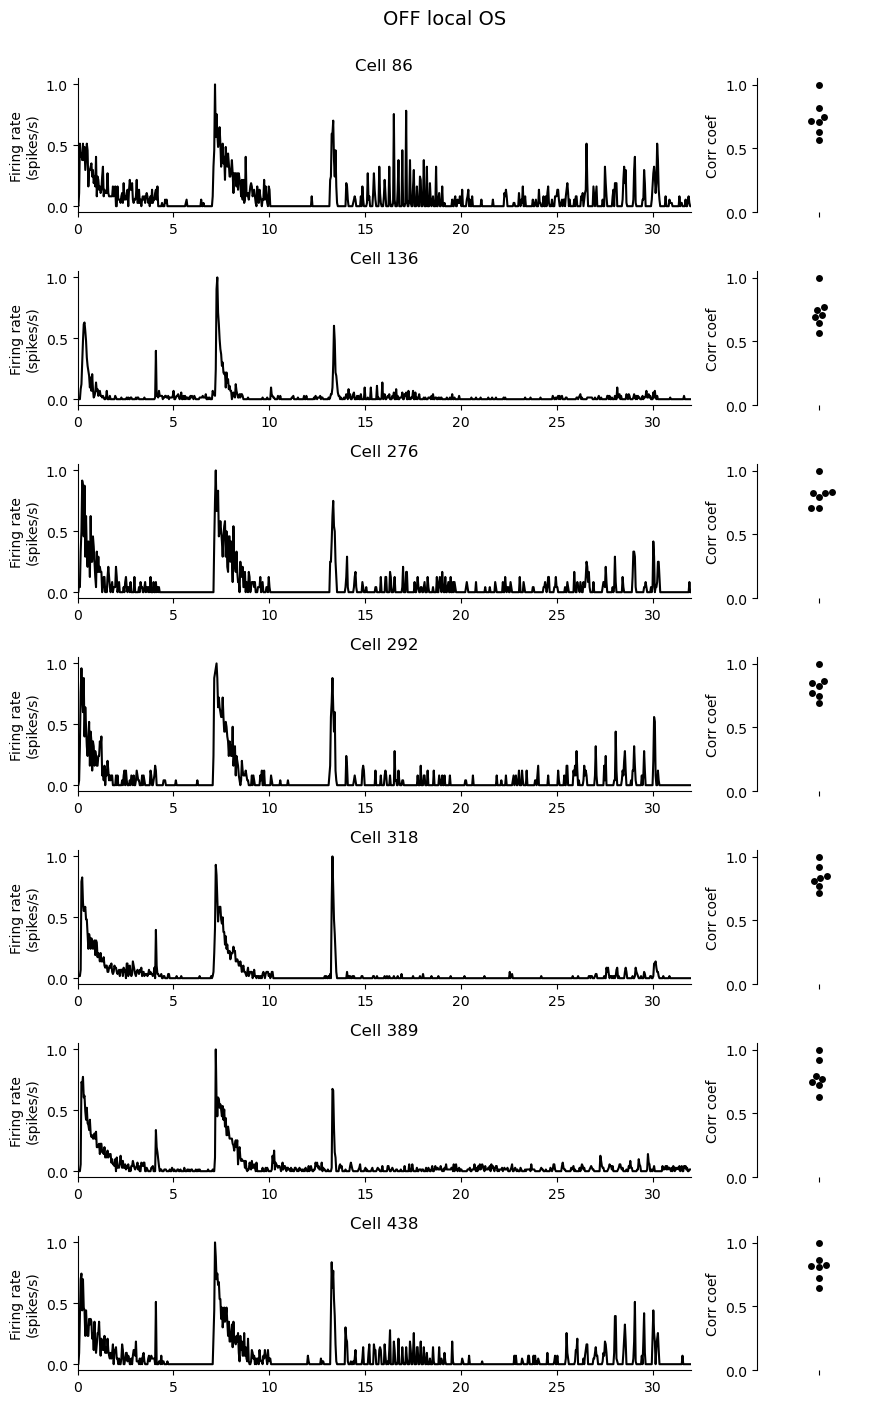

OFF DS : [ 22 153 287]
[0.5158917  0.65244657]
[0.5158917  0.65328189]
[0.65244657 0.65328189]


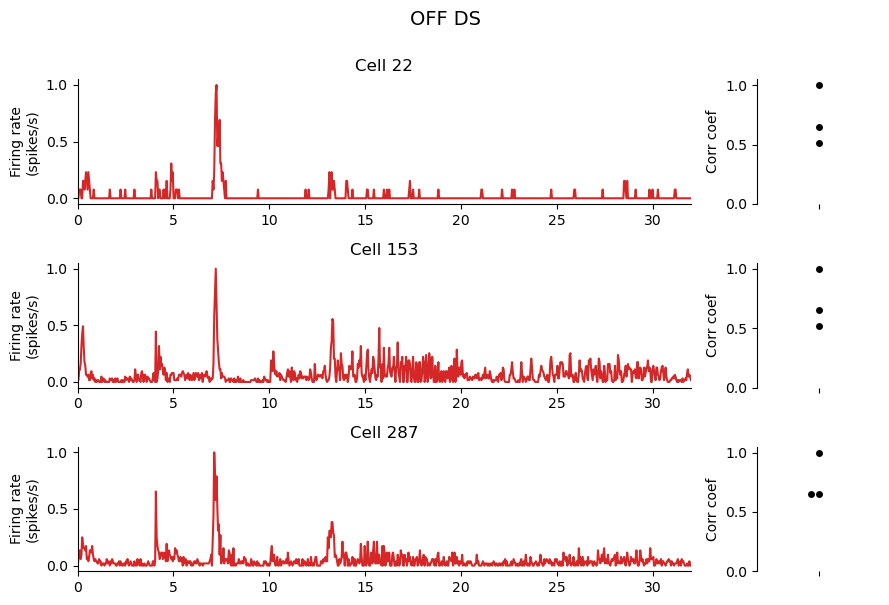

OFF step : [260 316]
[0.63626837]
[0.63626837]


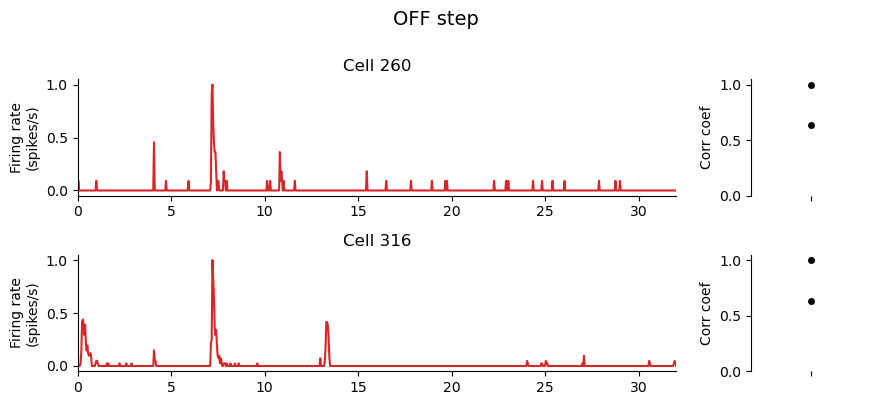

OFF slow : [ 20 125 195]
[0.90221044 0.93648354]
[0.90221044 0.90144824]
[0.93648354 0.90144824]


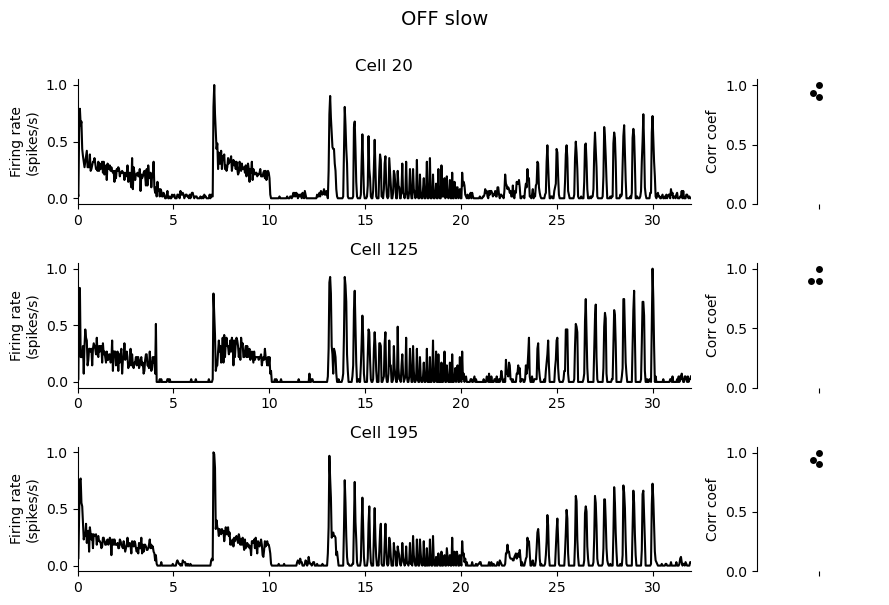

ON-OFF JAM-B : [138 263 271 411 419 420 421 450 464 471 480]
[0.97898877 0.96877209 0.93528557 0.98303654 0.97179737 0.96808513
 0.94197723 0.88123598 0.97906112 0.97253672]
[0.97898877 0.95254883 0.9399378  0.97630174 0.95183617 0.95567167
 0.9621376  0.91142861 0.97208924 0.97773177]
[0.96877209 0.95254883 0.93560878 0.96811872 0.97617497 0.97224848
 0.92066821 0.8459246  0.9737968  0.95017636]
[0.93528557 0.9399378  0.93560878 0.95674585 0.94103781 0.93913589
 0.93112839 0.83493977 0.94637916 0.91801891]
[0.98303654 0.97630174 0.96811872 0.95674585 0.96987262 0.96506349
 0.94121044 0.86585762 0.9748571  0.96391743]
[0.97179737 0.95183617 0.97617497 0.94103781 0.96987262 0.98559727
 0.92536977 0.84347231 0.97623754 0.94785486]
[0.96808513 0.95567167 0.97224848 0.93913589 0.96506349 0.98559727
 0.93162325 0.86336762 0.97811007 0.95240767]
[0.94197723 0.9621376  0.92066821 0.93112839 0.94121044 0.92536977
 0.93162325 0.94651216 0.95687677 0.96838453]
[0.88123598 0.91142861 0.8459246  0

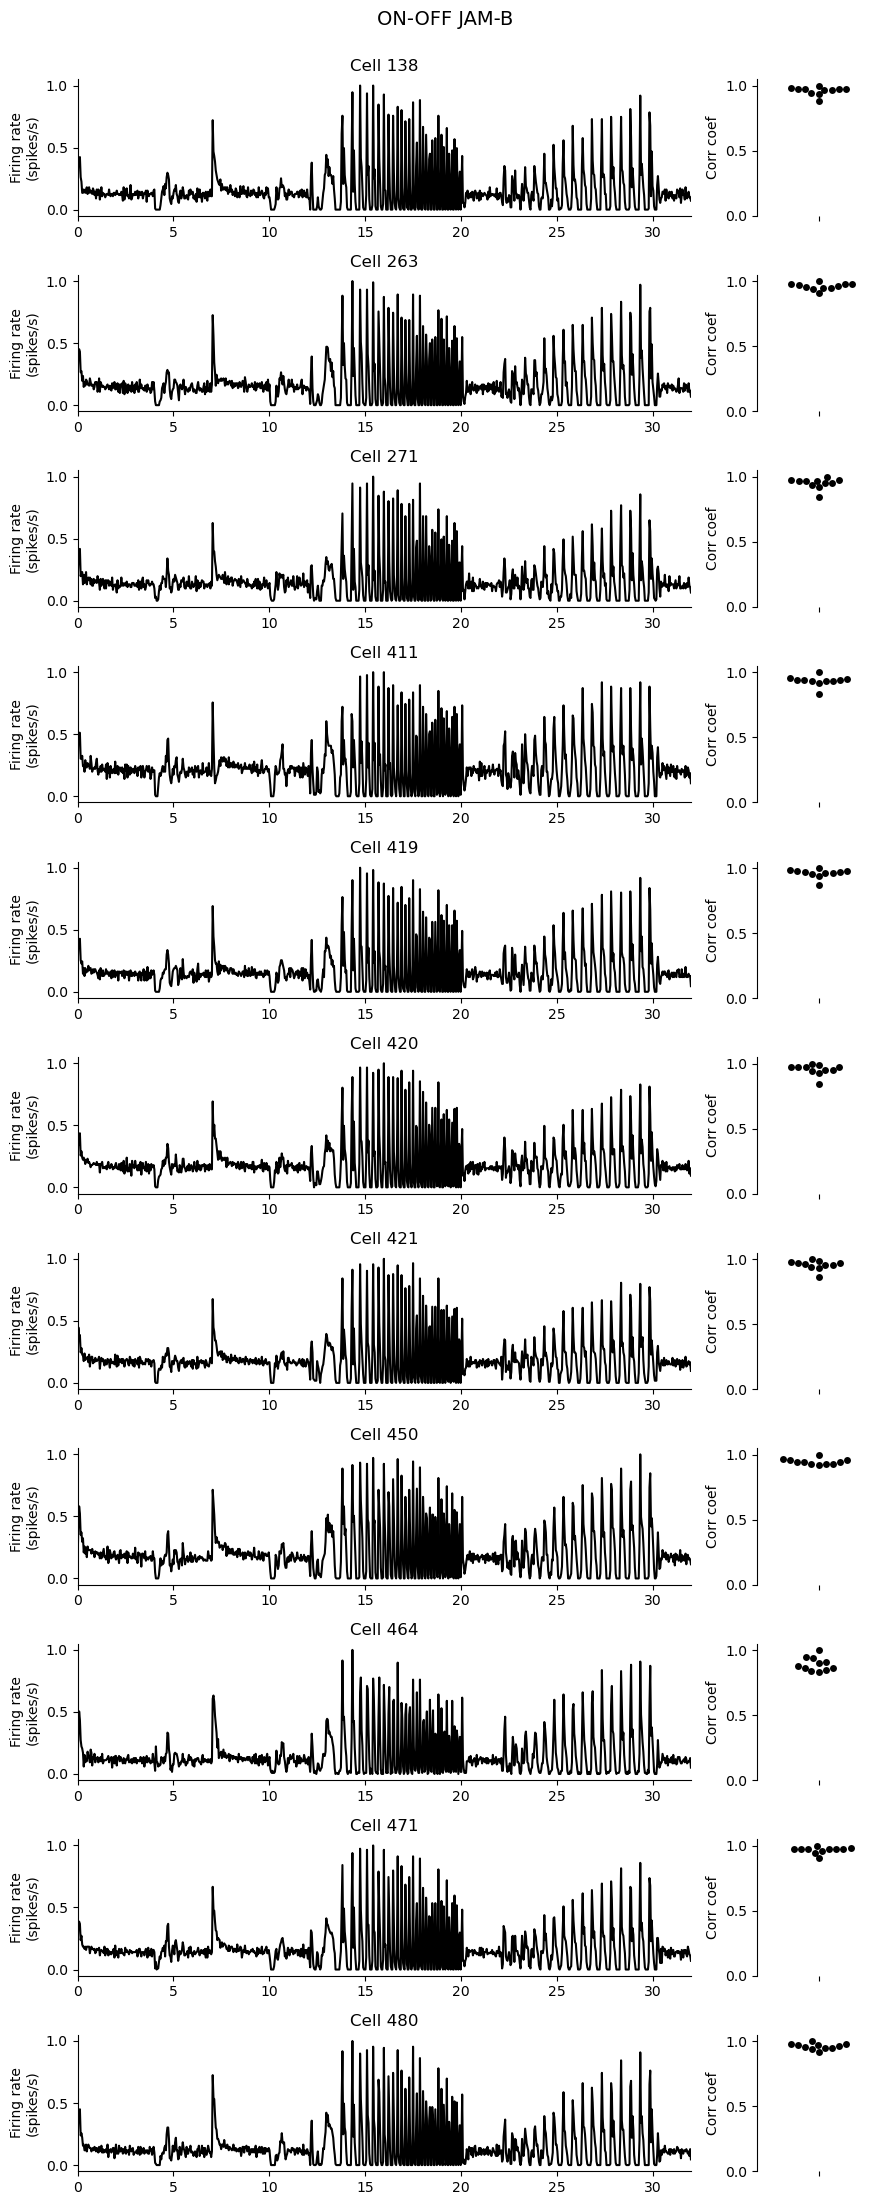

OFF alpha transient : [ 10 361]
[0.49075132]
[0.49075132]


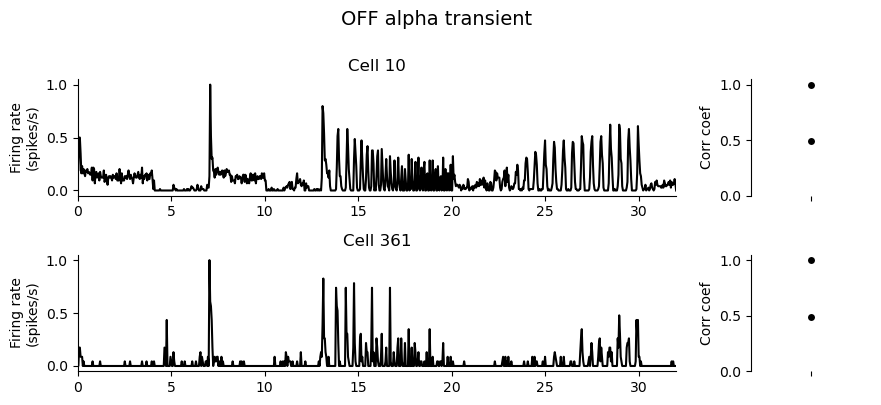

OFF mini alpha transient : [210 335 382 387 441 466 497 576 580 605 613]
[0.31308845 0.9632334  0.87809412 0.96025172 0.89197336 0.92825409
 0.94154692 0.79256758 0.87505909 0.9550769 ]
[0.31308845 0.34562713 0.45034902 0.36257784 0.41173096 0.37537938
 0.4032023  0.36827284 0.35863207 0.36948719]
[0.9632334  0.34562713 0.92813777 0.94774805 0.93525582 0.94633591
 0.95600941 0.85778335 0.92803928 0.93650503]
[0.87809412 0.45034902 0.92813777 0.88122675 0.95232332 0.92581669
 0.93226505 0.8971651  0.94187921 0.86808153]
[0.96025172 0.36257784 0.94774805 0.88122675 0.91582031 0.95174396
 0.9565461  0.7948304  0.87686504 0.96247907]
[0.89197336 0.41173096 0.93525582 0.95232332 0.91582031 0.95594753
 0.9512762  0.92851635 0.96678704 0.8749532 ]
[0.92825409 0.37537938 0.94633591 0.92581669 0.95174396 0.95594753
 0.96371187 0.85142499 0.92969191 0.92181095]
[0.94154692 0.4032023  0.95600941 0.93226505 0.9565461  0.9512762
 0.96371187 0.85221836 0.92078637 0.93801949]
[0.79256758 0.36827284 0

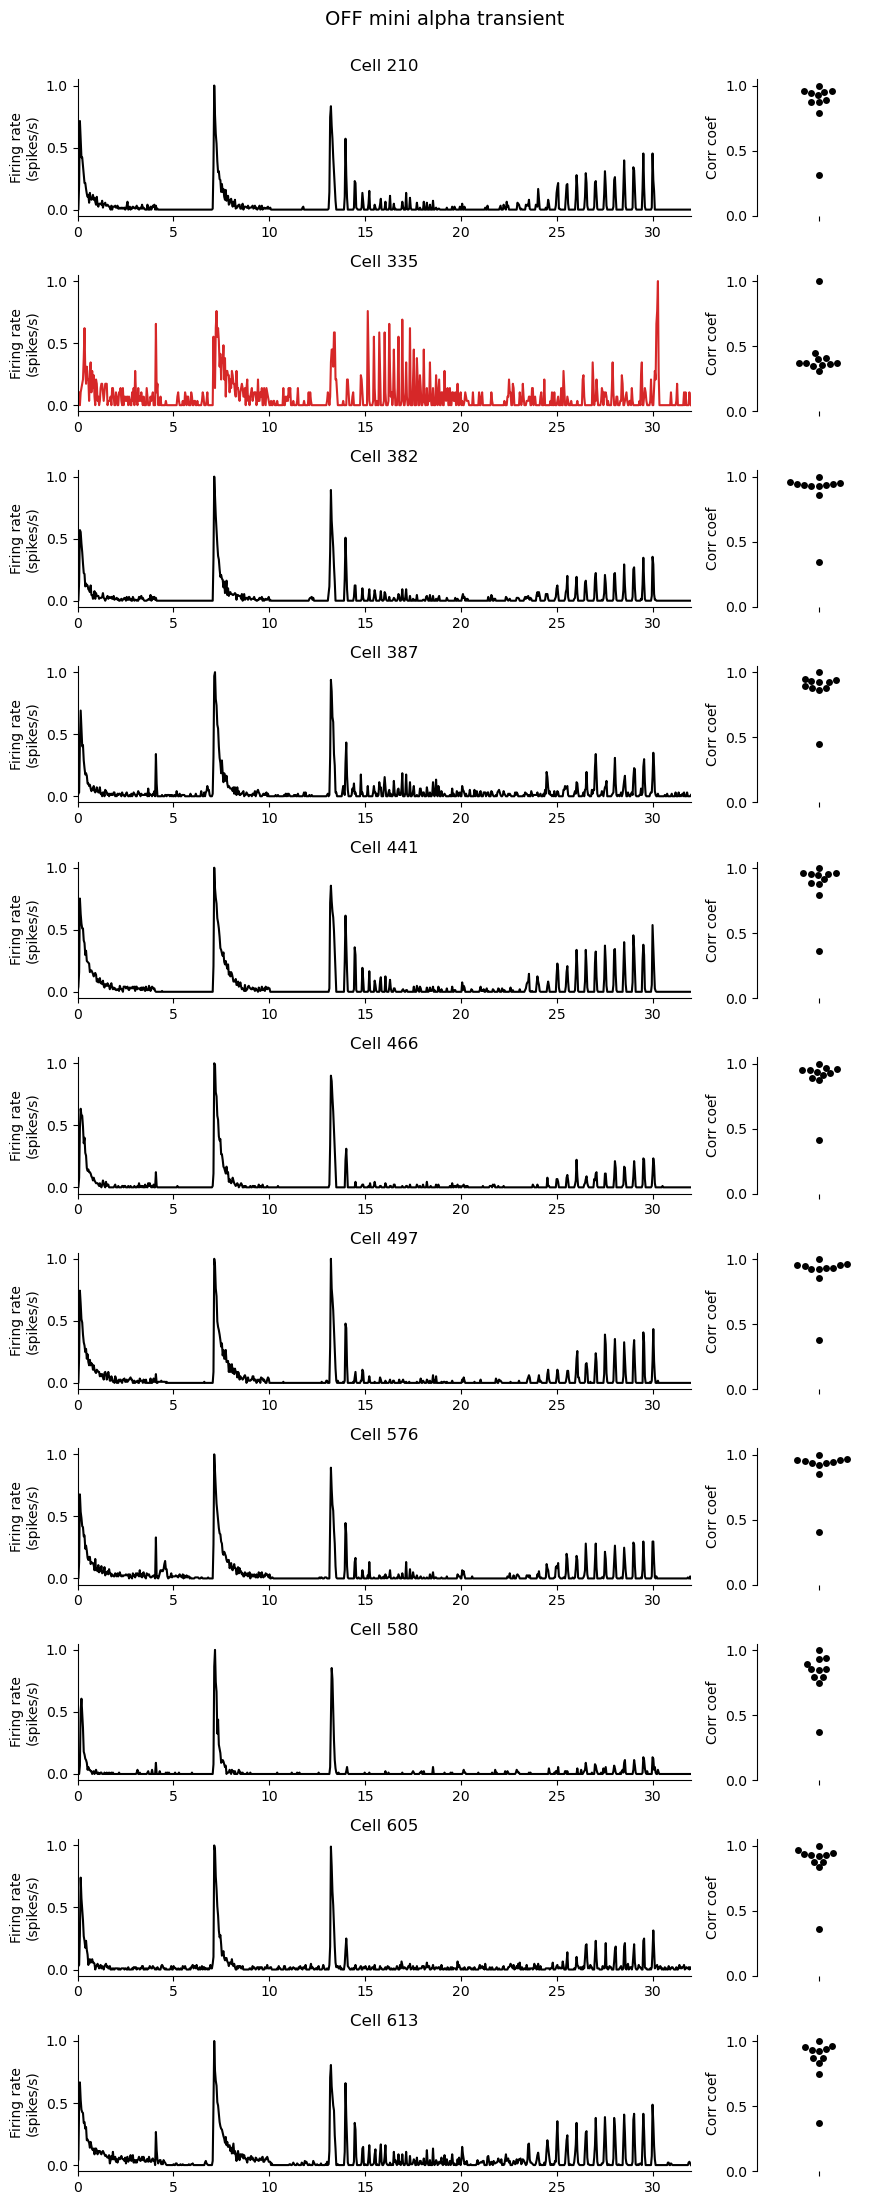

ON-OFF local-edge W3 : [368]
[]


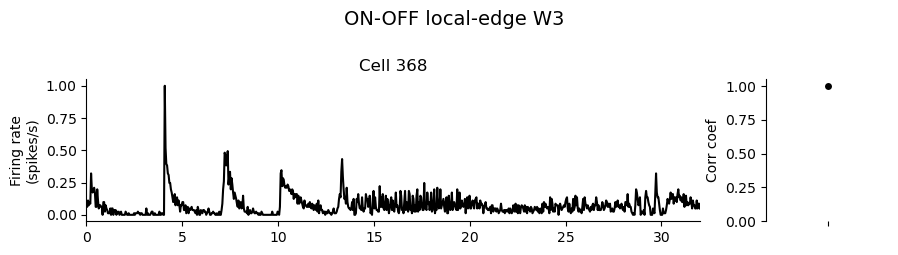

ON-OFF local : [83]
[]


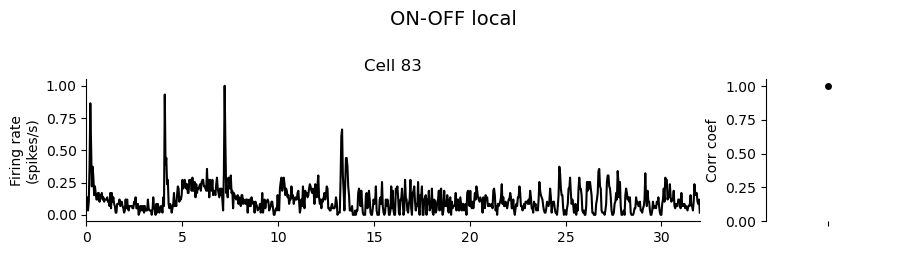

ON-OFF DS 2 : [359 532 546 592]
[0.62524038 0.54549317 0.71783043]
[0.62524038 0.56076349 0.72704881]
[0.54549317 0.56076349 0.59527478]
[0.71783043 0.72704881 0.59527478]


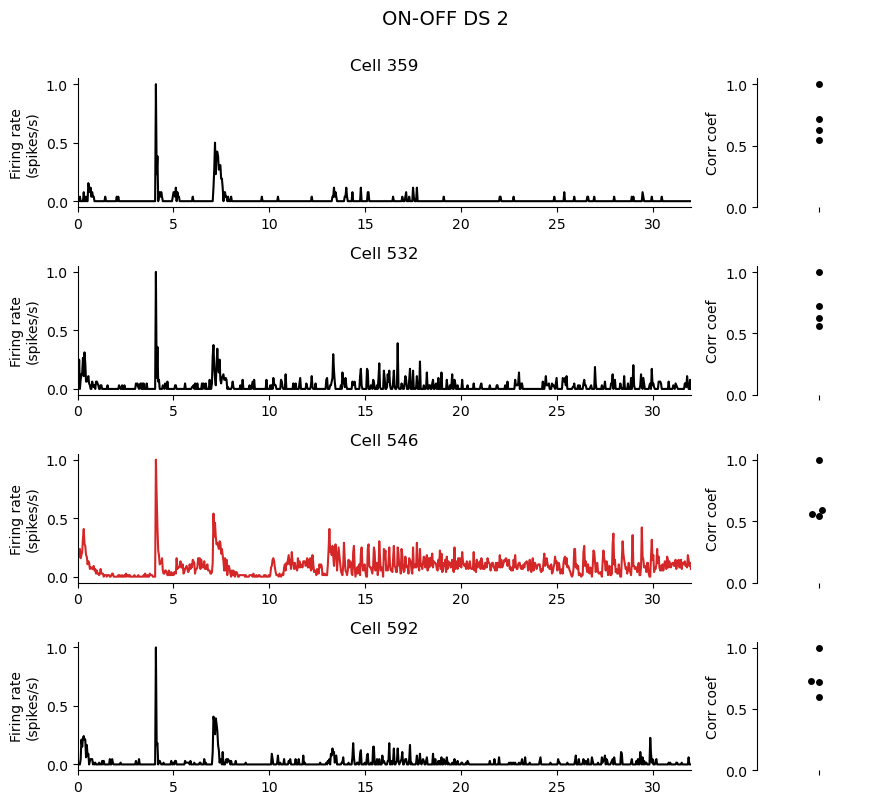

ON-OFF local OS : [119 130 380 460]
[0.48186446 0.49565004 0.55158536]
[0.48186446 0.60939905 0.64499016]
[0.49565004 0.60939905 0.76862636]
[0.55158536 0.64499016 0.76862636]


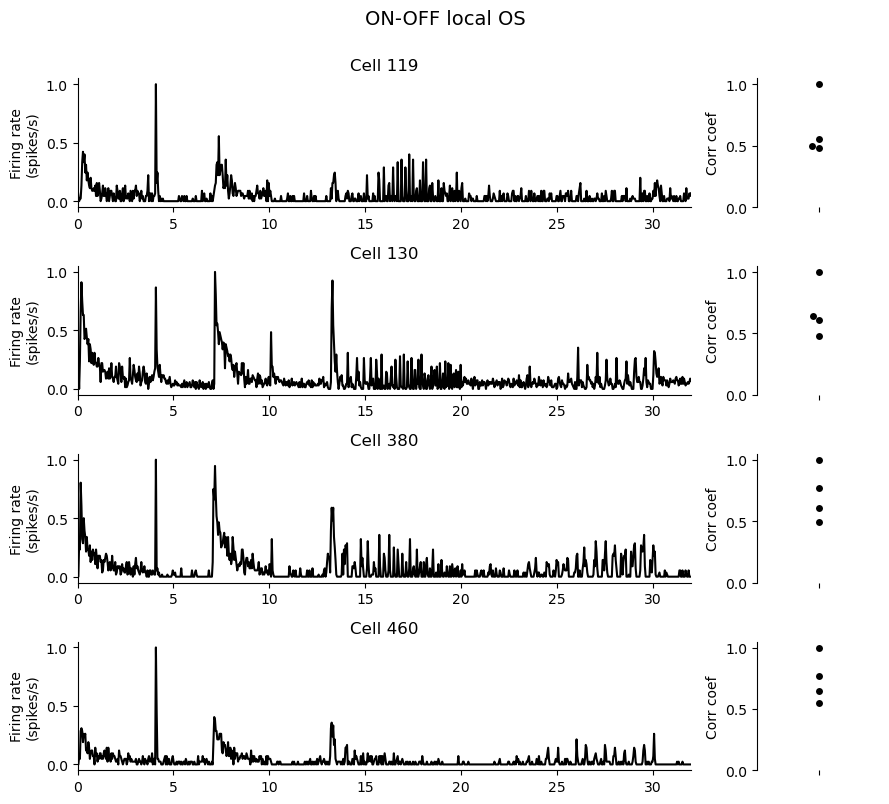

ON step : [100 102 162 296 452 506]
[0.83992825 0.40461371 0.88081953 0.74875925 0.82570267]
[0.83992825 0.52610202 0.81883396 0.73185485 0.69578152]
[0.40461371 0.52610202 0.50841309 0.64854757 0.52359772]
[0.88081953 0.81883396 0.50841309 0.80520678 0.83959386]
[0.74875925 0.73185485 0.64854757 0.80520678 0.74615684]
[0.82570267 0.69578152 0.52359772 0.83959386 0.74615684]


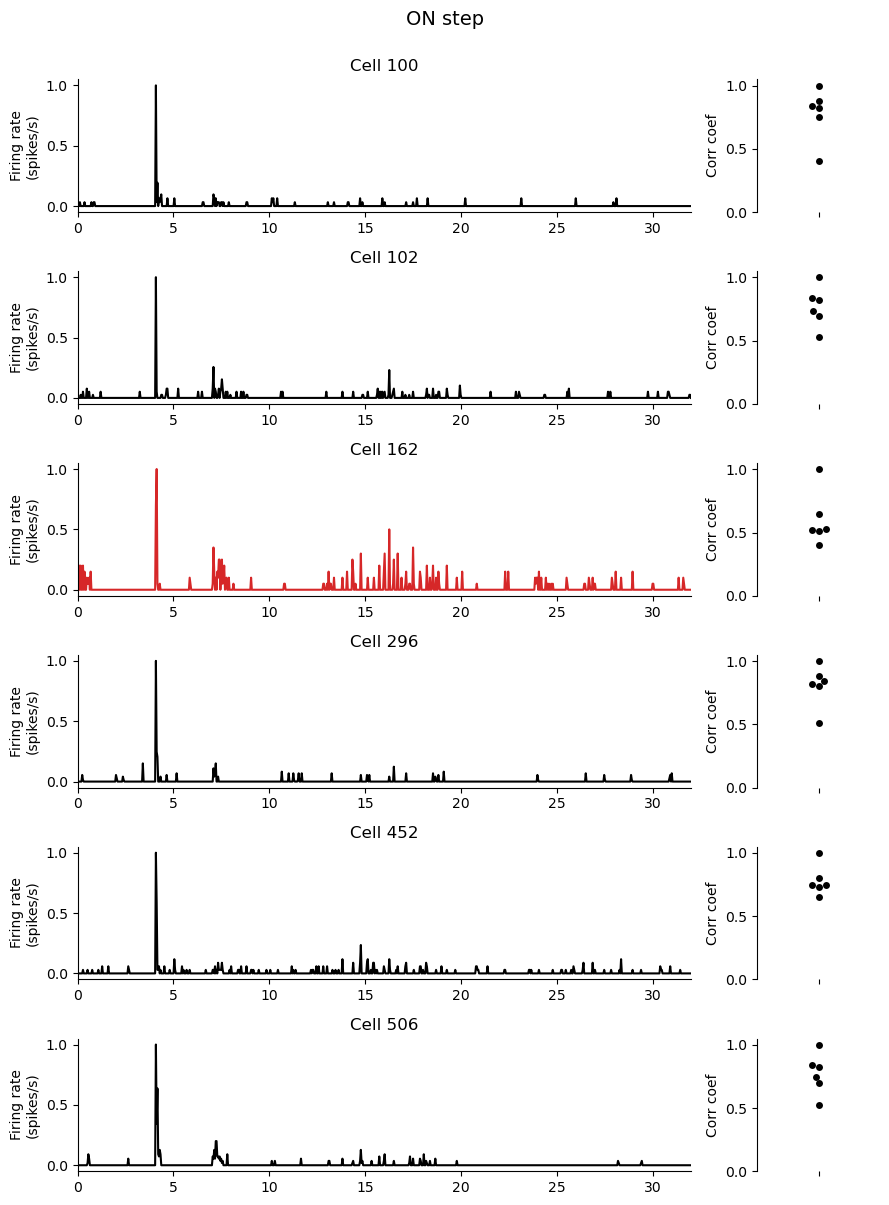

ON local transient OS : [ 45 498]
[0.75692277]
[0.75692277]


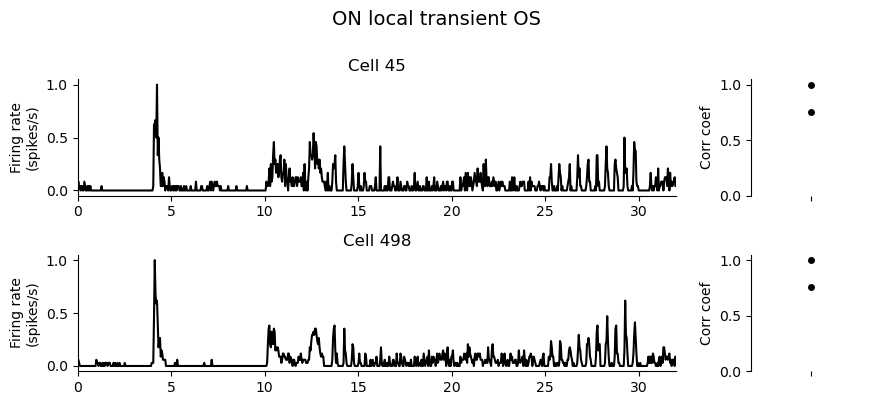

ON transient : [ 41  62 112 220 241 280 401 447 469 511]
[0.96721489 0.91341415 0.93565747 0.92923372 0.91695477 0.9168505
 0.88245666 0.94071537 0.91547569]
[0.96721489 0.91734053 0.93120148 0.95247633 0.94754165 0.90027037
 0.87885009 0.95798428 0.94965948]
[0.91341415 0.91734053 0.89653128 0.84461633 0.91282267 0.87172302
 0.8251354  0.88653533 0.85782142]
[0.93565747 0.93120148 0.89653128 0.85293262 0.8863784  0.94406248
 0.93353696 0.92367328 0.88000921]
[0.92923372 0.95247633 0.84461633 0.85293262 0.94144655 0.8100463
 0.79945812 0.92771532 0.95320151]
[0.91695477 0.94754165 0.91282267 0.8863784  0.94144655 0.84178567
 0.83857926 0.9327143  0.94312404]
[0.9168505  0.90027037 0.87172302 0.94406248 0.8100463  0.84178567
 0.90971745 0.90081735 0.84011675]
[0.88245666 0.87885009 0.8251354  0.93353696 0.79945812 0.83857926
 0.90971745 0.87887276 0.8352967 ]
[0.94071537 0.95798428 0.88653533 0.92367328 0.92771532 0.9327143
 0.90081735 0.87887276 0.94708338]
[0.91547569 0.94965948 0.857

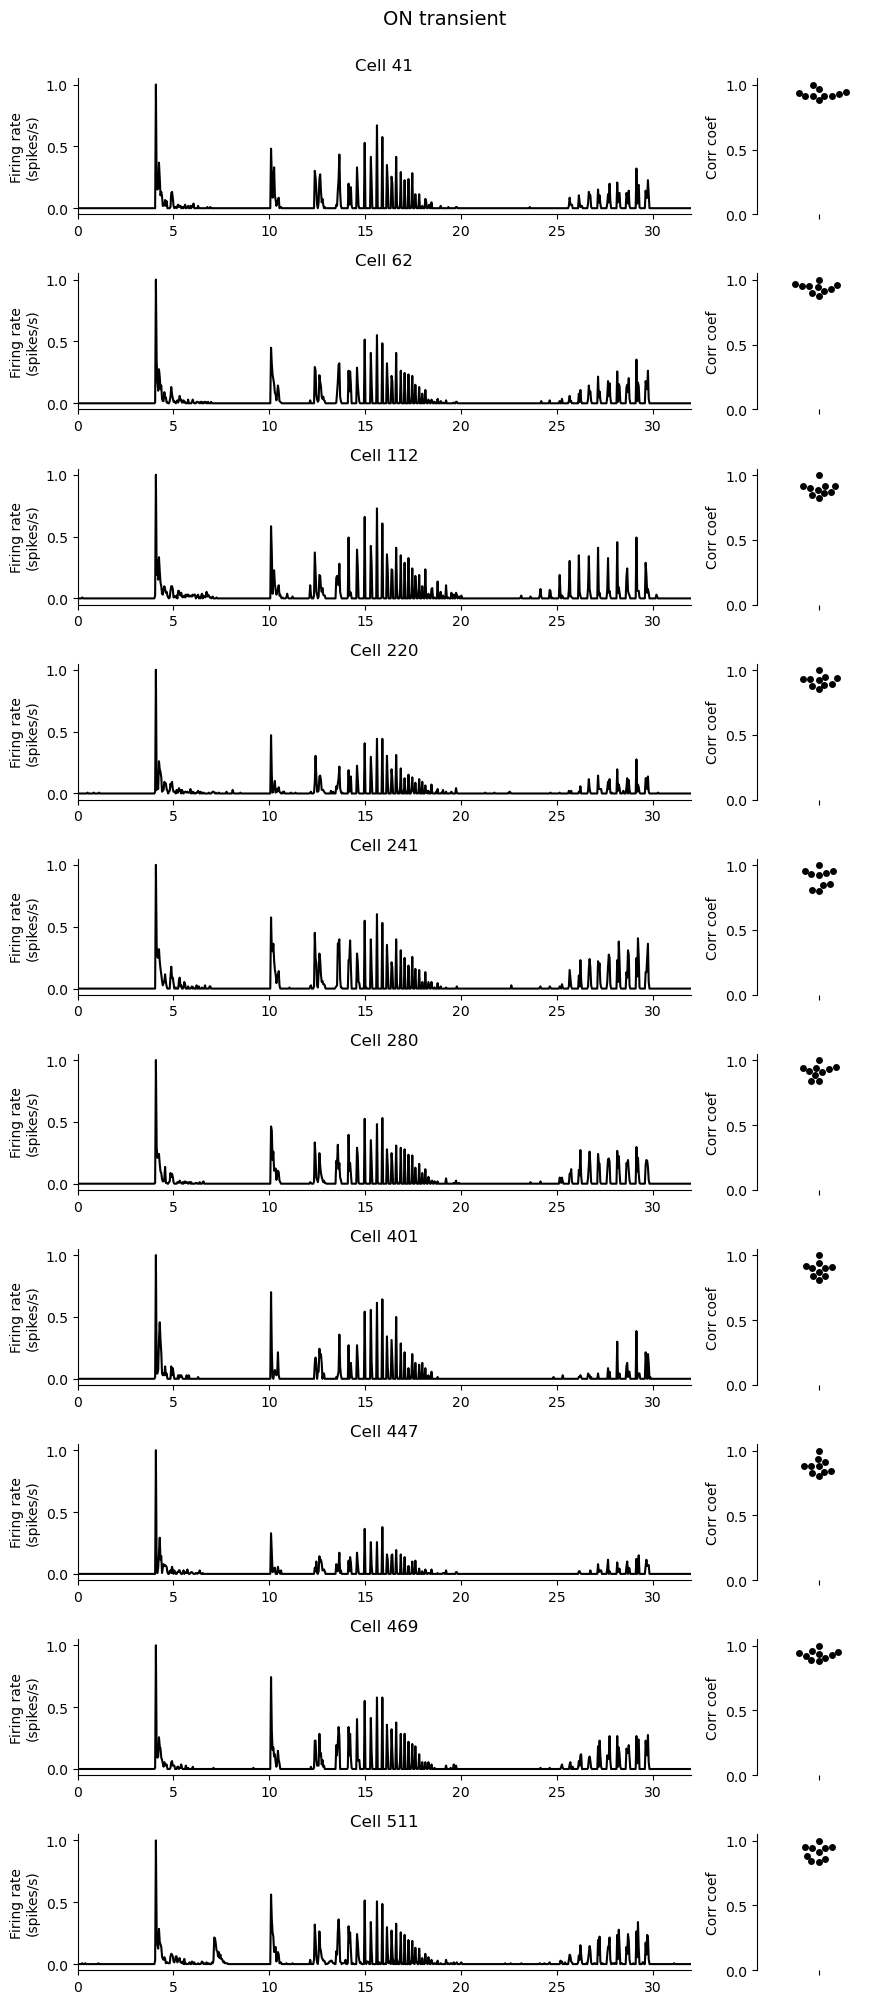

ON high frequency : [247 415 482 544]
[0.19405648 0.11678423 0.23820073]
[0.19405648 0.67690598 0.62833481]
[0.11678423 0.67690598 0.65237206]
[0.23820073 0.62833481 0.65237206]


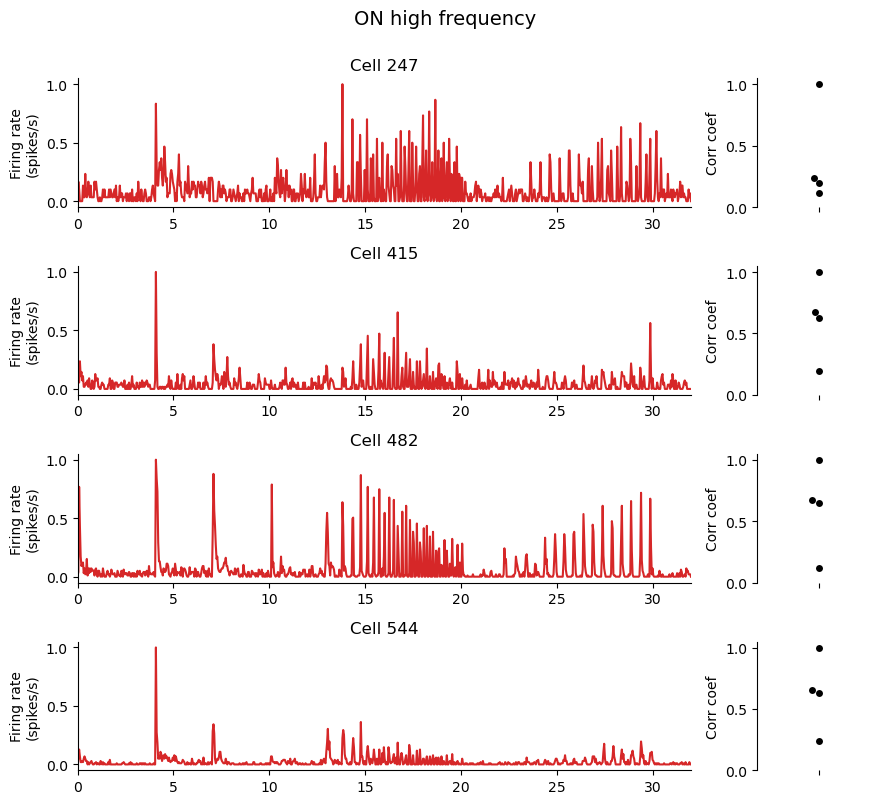

ON low frequency : [ 73  99 270 407]
[0.30922486 0.46913188 0.47903078]
[0.30922486 0.63260763 0.50650214]
[0.46913188 0.63260763 0.39884763]
[0.47903078 0.50650214 0.39884763]


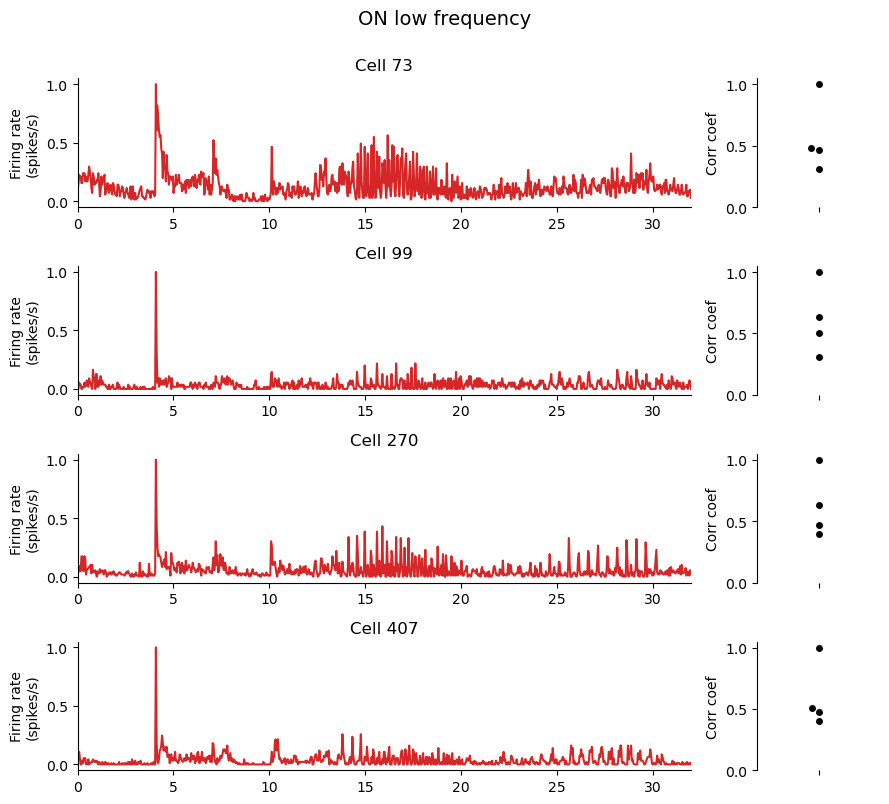

ON sustained : [158 329 356]
[0.78305372 0.73855705]
[0.78305372 0.79134662]
[0.73855705 0.79134662]


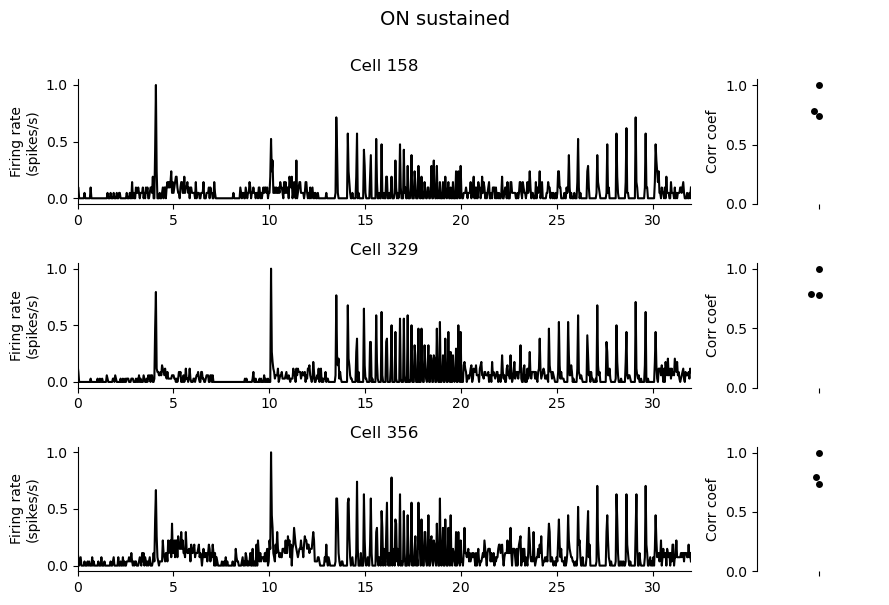

ON mini alpha : [ 55 360 439 472 529]
[0.56134495 0.67187039 0.84767139 0.9158695 ]
[0.56134495 0.61847838 0.61217589 0.64517382]
[0.67187039 0.61847838 0.6613762  0.74594155]
[0.84767139 0.61217589 0.6613762  0.88913066]
[0.9158695  0.64517382 0.74594155 0.88913066]


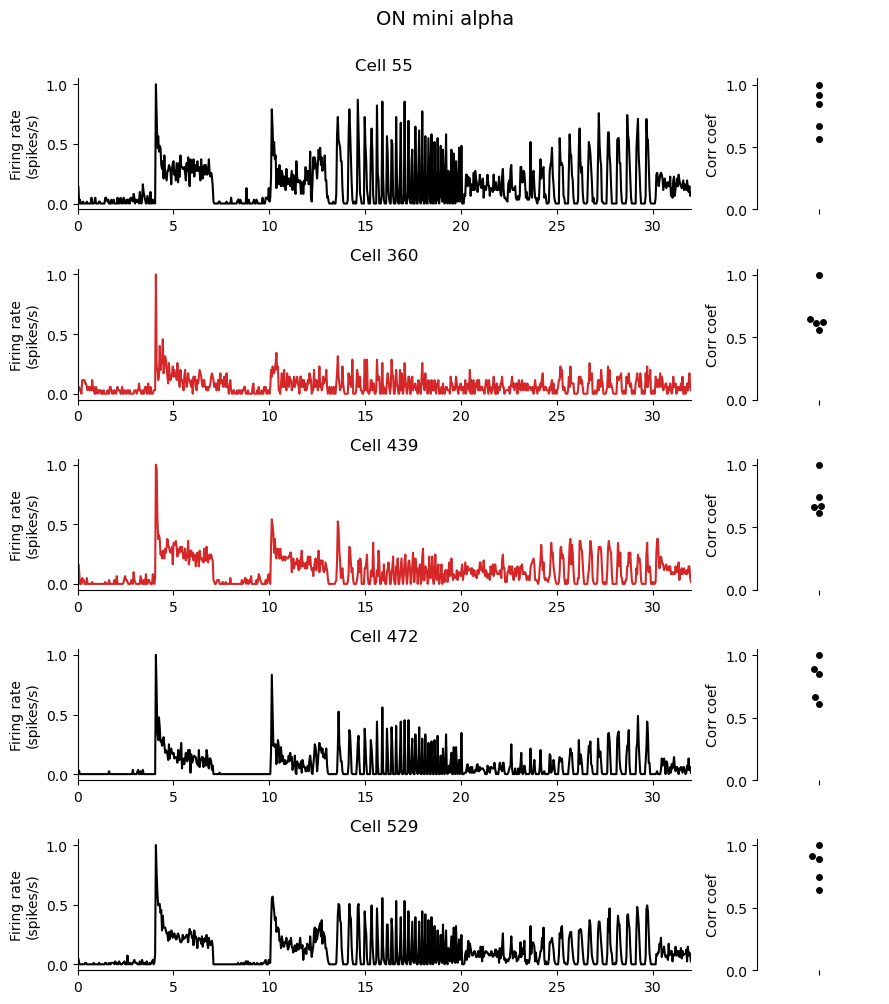

ON alpha : [144 273 424 435 449 463 478 513]
[0.77847255 0.83987294 0.85298974 0.8204574  0.81470583 0.58682183
 0.83848926]
[0.77847255 0.8600892  0.86131374 0.85512979 0.84492521 0.74225598
 0.84566208]
[0.83987294 0.8600892  0.98313563 0.96736492 0.95765014 0.73673034
 0.98408435]
[0.85298974 0.86131374 0.98313563 0.97148964 0.96333606 0.74120327
 0.98240049]
[0.8204574  0.85512979 0.96736492 0.97148964 0.97872967 0.7288876
 0.9690355 ]
[0.81470583 0.84492521 0.95765014 0.96333606 0.97872967 0.72288661
 0.9608311 ]
[0.58682183 0.74225598 0.73673034 0.74120327 0.7288876  0.72288661
 0.73791482]
[0.83848926 0.84566208 0.98408435 0.98240049 0.9690355  0.9608311
 0.73791482]


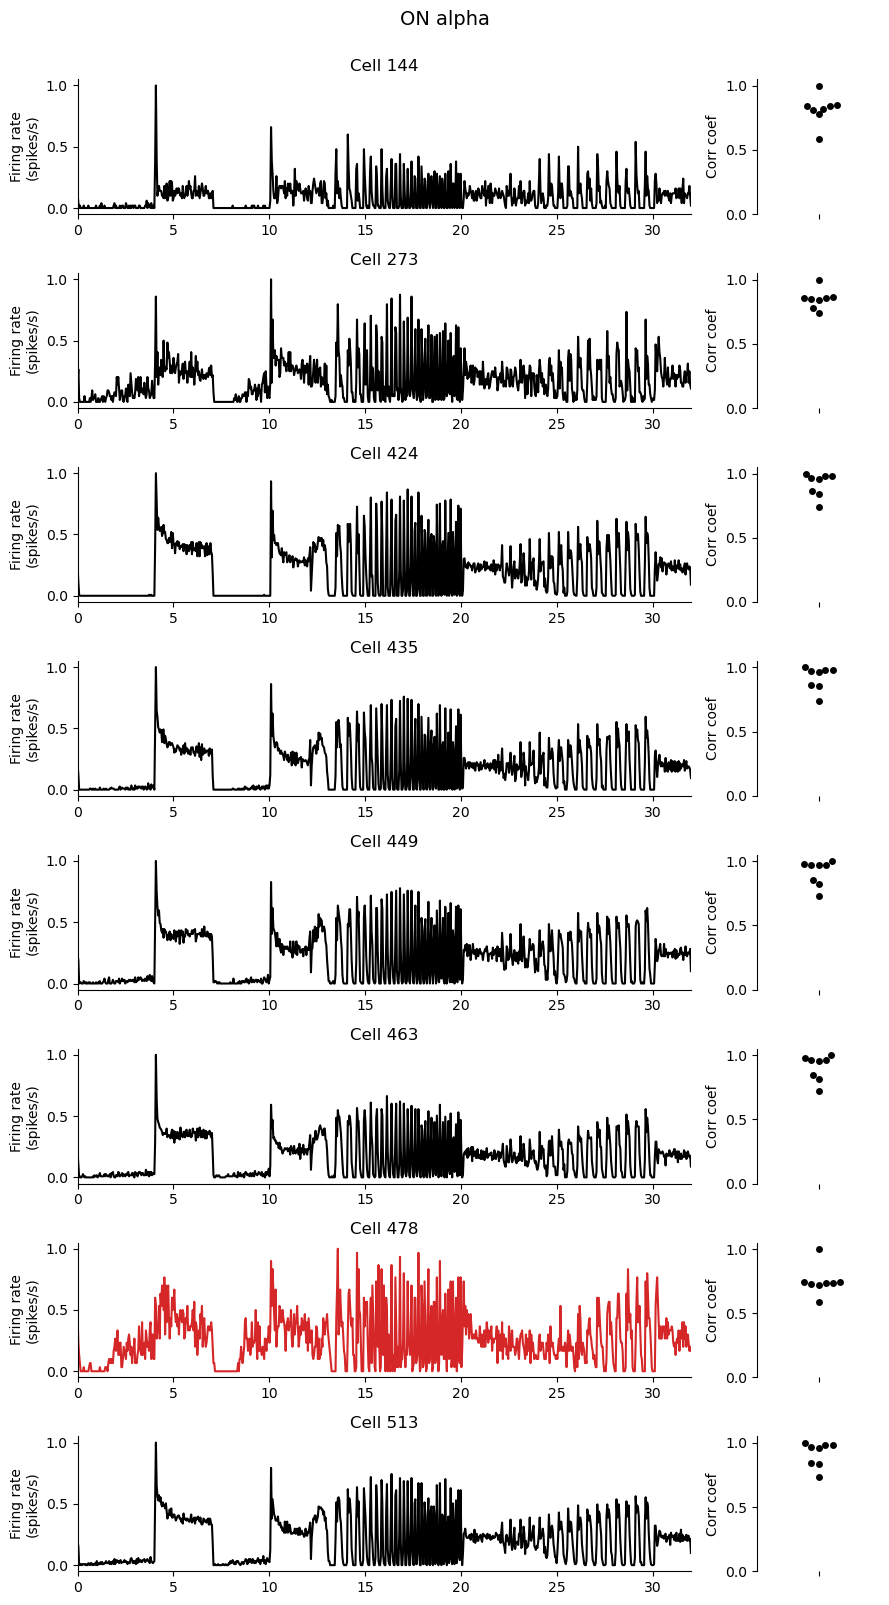

ON DS sustained 1 : [ 63 422 430 457 515]
[0.84561927 0.88120409 0.8464     0.73040428]
[0.84561927 0.82297927 0.80969151 0.68901404]
[0.88120409 0.82297927 0.78958639 0.7085946 ]
[0.8464     0.80969151 0.78958639 0.7425257 ]
[0.73040428 0.68901404 0.7085946  0.7425257 ]


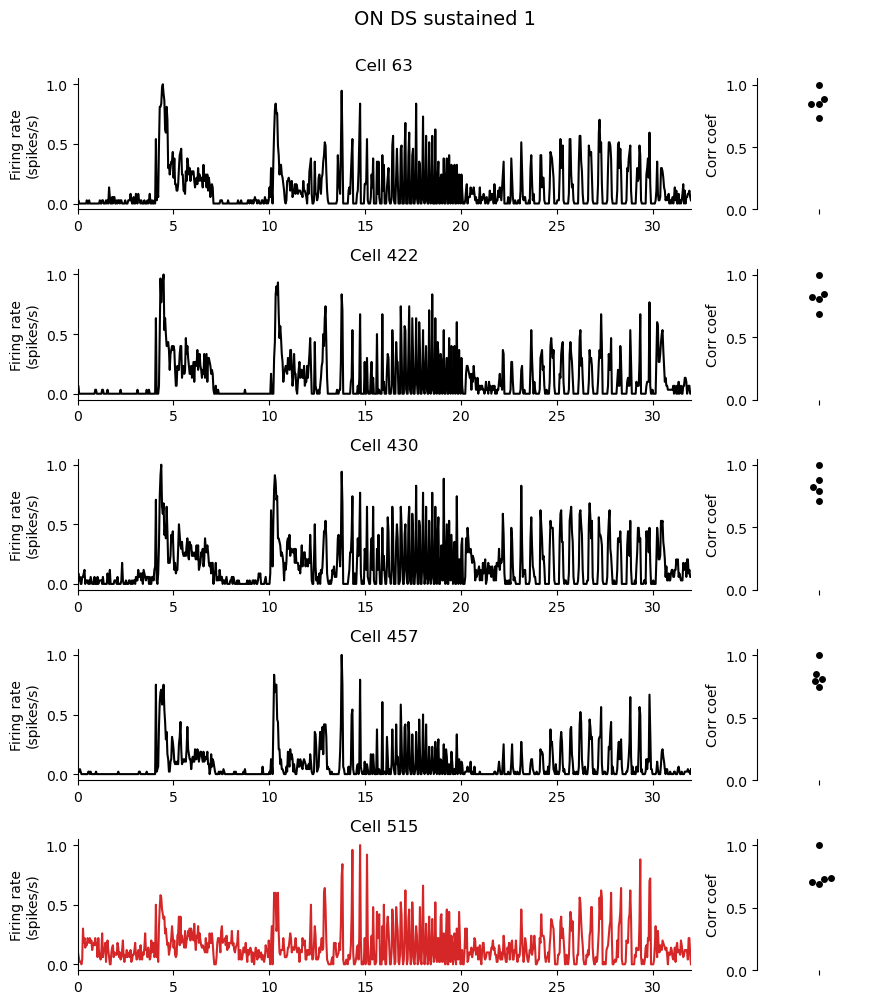

ON DS sustained 2 : [  5  66 126 284 300 333 370 406 470 493]
[0.6461515  0.46207821 0.83900757 0.77199178 0.74627379 0.62355096
 0.5222772  0.78011084 0.6177303 ]
[0.6461515  0.41513976 0.59767866 0.5889872  0.86945063 0.72345082
 0.55181801 0.89017428 0.7032102 ]
[0.46207821 0.41513976 0.41117056 0.59881611 0.43375863 0.59675215
 0.73824658 0.53841506 0.64632313]
[0.83900757 0.59767866 0.41117056 0.70887915 0.72605095 0.5613578
 0.43540674 0.74105145 0.55043726]
[0.77199178 0.5889872  0.59881611 0.70887915 0.67990897 0.6906255
 0.57677629 0.7573412  0.63663292]
[0.74627379 0.86945063 0.43375863 0.72605095 0.67990897 0.71313258
 0.57402897 0.91034027 0.74038021]
[0.62355096 0.72345082 0.59675215 0.5613578  0.6906255  0.71313258
 0.70853069 0.79447267 0.82294647]
[0.5222772  0.55181801 0.73824658 0.43540674 0.57677629 0.57402897
 0.70853069 0.64714796 0.73471707]
[0.78011084 0.89017428 0.53841506 0.74105145 0.7573412  0.91034027
 0.79447267 0.64714796 0.78503455]
[0.6177303  0.7032102 

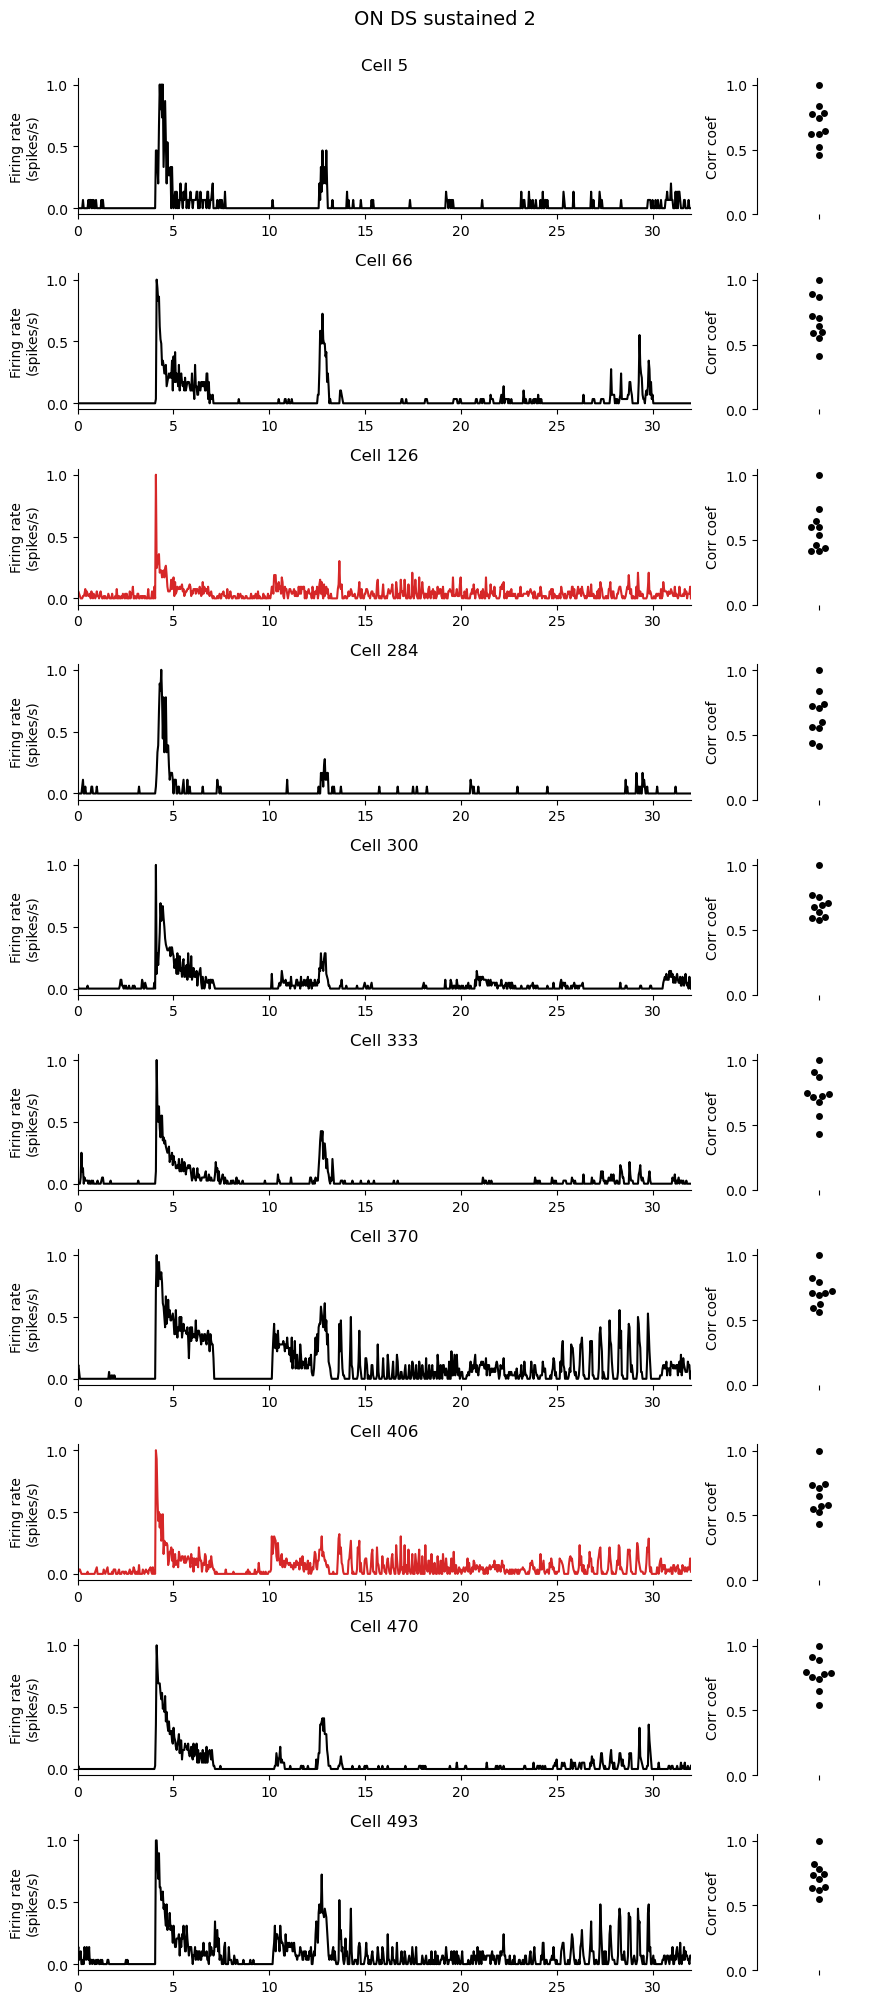

ON DS sustained 3 : [168 238]
[0.93607093]
[0.93607093]


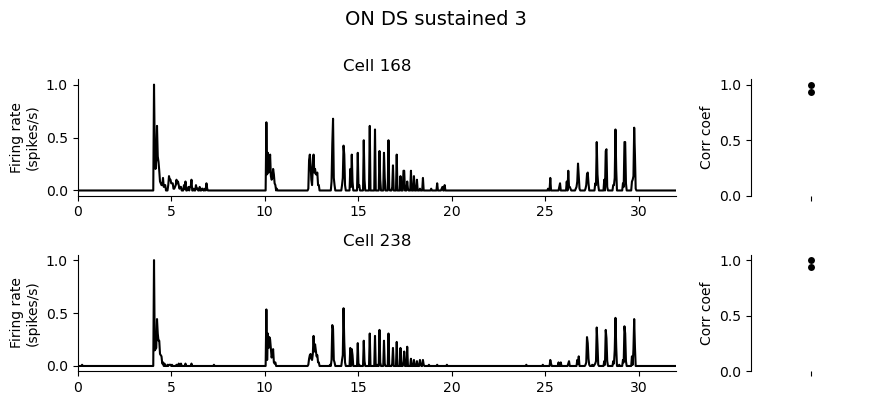

OFF suppression 2 : [ 78 283 486 496]
[0.24800018 0.38066001 0.1010071 ]
[0.24800018 0.47976171 0.61499658]
[0.38066001 0.47976171 0.35157132]
[0.1010071  0.61499658 0.35157132]


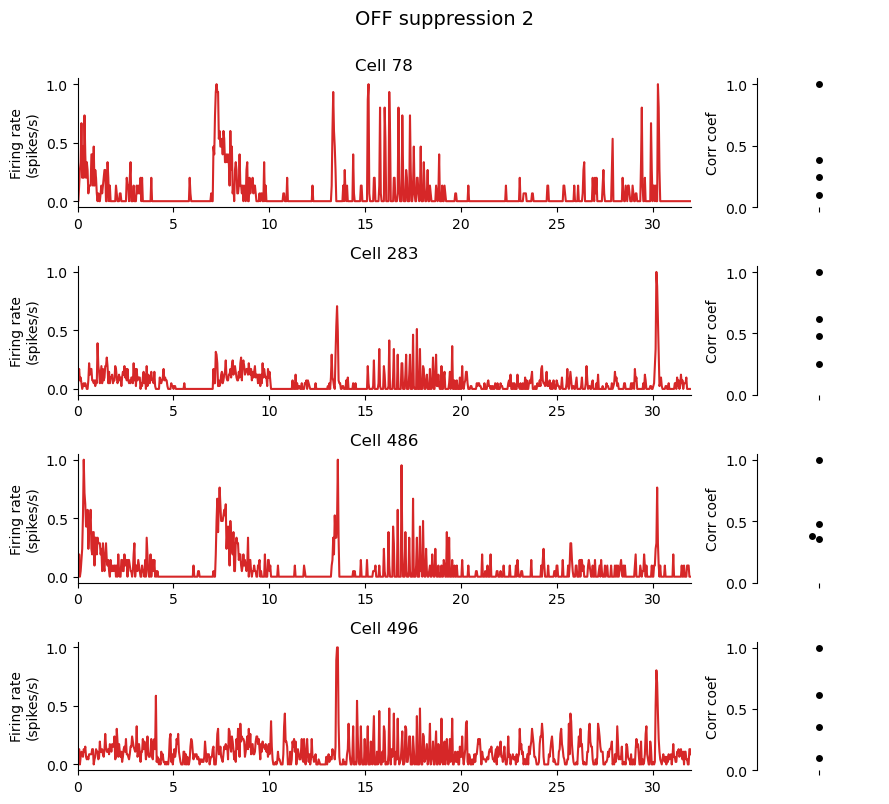

In [23]:
cell_types_cleaned = np.copy(cell_types)
# euler_labels_cleaning = zeros(len(euler_labels)) # 0: present but not cleaned type not present, 1: , 2: cleaned

baseline_len = 4 # sec
dt = 0.04 # sec
baseline_end = int(baseline_len / dt)

removed_cells = []

for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(9, 2.5))
        else:
            fig = plt.figure(figsize=(9, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 2, width_ratios = [5,1])

        cross_corrs = np.zeros((len(selected_cells), len(selected_cells)))
        
        for i, cell_nb in enumerate(selected_cells):
            cell_index = where(cells_clustering == cell_nb)[0][0]
#             print (cell_nb, cells_clustering[cell_index])

            psth = cell_data[cell_nb]['psth']

            # Normalization
            psth = psth/max(psth)

            # Cross corr
            for j, cell_nb2 in enumerate(selected_cells):
                psth2 = cell_data[cell_nb2]['psth']
                # Normalization
                psth2 = psth2/max(psth2)

                cross_corrs[i,j] = np.corrcoef(psth, psth2)[0,1]
            
            # Remove that cell ?
            print (np.delete(cross_corrs[i], i))
            
            ax = fig.add_subplot(GS[i,0])
            
            if euler_label_names[iLabel] == 'ON-OFF DS 2':
                threshold = 0.7
            elif euler_label_names[iLabel] == 'ON-OFF local OS':
                threshold = 0.55
            elif euler_label_names[iLabel] == 'OFF alpha transient':
                threshold = 0.45
            else:
                threshold = 0.75
            
            if len(selected_cells) > 1 and all(delete(cross_corrs[i], i) < threshold):
                ax.plot(np.linspace(0,32,800), psth, 'C3')
                removed_cells.append(cell_nb)
                cell_types_cleaned[cell_index] = nan
            else:
                ax.plot(np.linspace(0,32,800), psth, 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
                
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
                
            ax = fig.add_subplot(GS[i,1])
            sns.swarmplot(y=cross_corrs[i], color='k')
            ax.set_ylim(0,1.05)
            ax.set_ylabel('Corr coef')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        plt.tight_layout()
        plt.show()

In [24]:
cell_types_cleaned

array([25.,  7.,  3., nan, 17., 16., 22., nan, 17., 24., 25., nan, nan,
       10.,  0., nan, 14., 14., 17., 13.,  3., nan, 13.,  0.,  5., 23.,
       nan, 21., nan, 28.,  3.,  8., 17., 28., 17., nan, nan,  5., nan,
        5., 23.,  0., 17., nan, 25., nan,  0., 14., 25., nan,  0., 21.,
       25., nan, 21., 12., nan,  7.,  9., 25., 13.,  8.,  8.,  0., 17.,
       nan, nan,  5., nan,  5.,  5.,  5., 24., 23., 24., 23.,  0., nan,
        8., 17., 23.,  5., 14., 24., 13., 23.,  5.,  8., 17., 25.,  5.,
       22., nan,  5., nan, nan, 25., nan,  8., 16., 14., 17., 23., nan,
       22., 12., nan, nan,  8.,  8., 12.,  8.,  8.])

In [25]:
where(cell_types_cleaned == 13)

(array([19, 22, 60, 84], dtype=int64),)

In [26]:
cells_clustering[where(cell_types_cleaned == 13)[0]]

array([119, 130, 380, 460], dtype=int64)

In [27]:
cell_types

array([25.,  7.,  3.,  1., 17., 16., 22., nan, 17., 24., 25., 20., 31.,
       10.,  0., 20., 14., 14., 17., 13.,  3., 25., 13.,  0.,  5., 23.,
        1., 21., 14., 28.,  3.,  8., 17., 28., 17., 19.,  2.,  5., 20.,
        5., 23.,  0., 17., 31., 25.,  1.,  0., 14., 25.,  2.,  0., 21.,
       25.,  8., 21., 12., 22.,  7.,  9., 25., 13.,  8.,  8.,  0., 17.,
       25., 20.,  5., 19.,  5.,  5.,  5., 24., 23., 24., 23.,  0., 22.,
        8., 17., 23.,  5., 14., 24., 13., 23.,  5.,  8., 17., 25.,  5.,
       22., 23.,  5., 19., 31., 25., 31.,  8., 16., 14., 17., 23., 24.,
       22., 12., 19., 12.,  8.,  8., 12.,  8.,  8.])

## Plot new types

OFF local OS : [ 86 136 276 292 318 389 438]


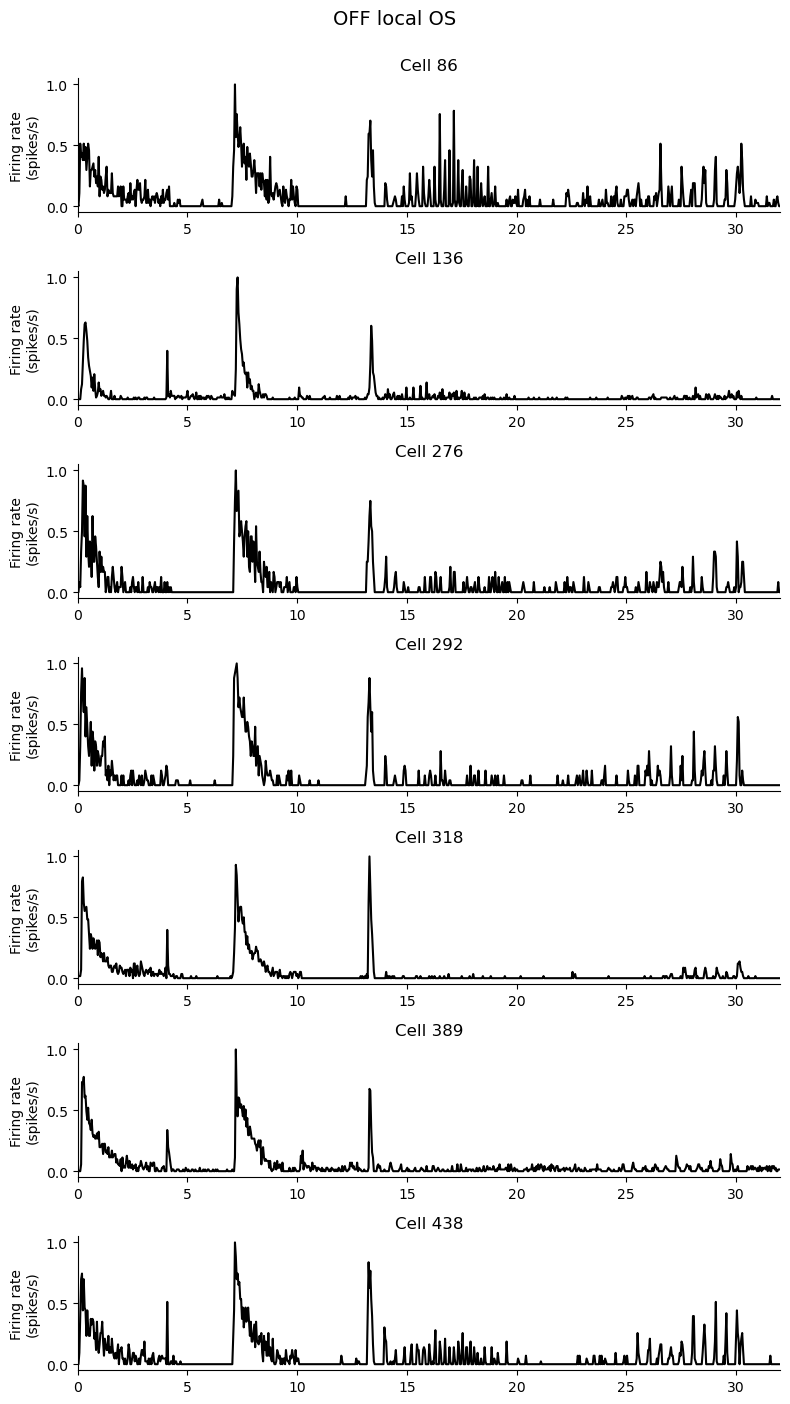

OFF slow : [ 20 125 195]


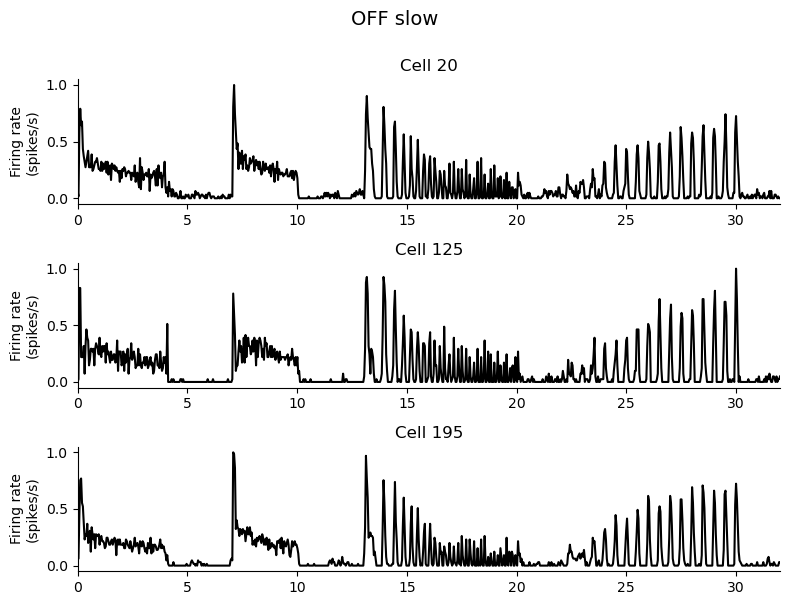

ON-OFF JAM-B : [138 263 271 411 419 420 421 450 464 471 480]


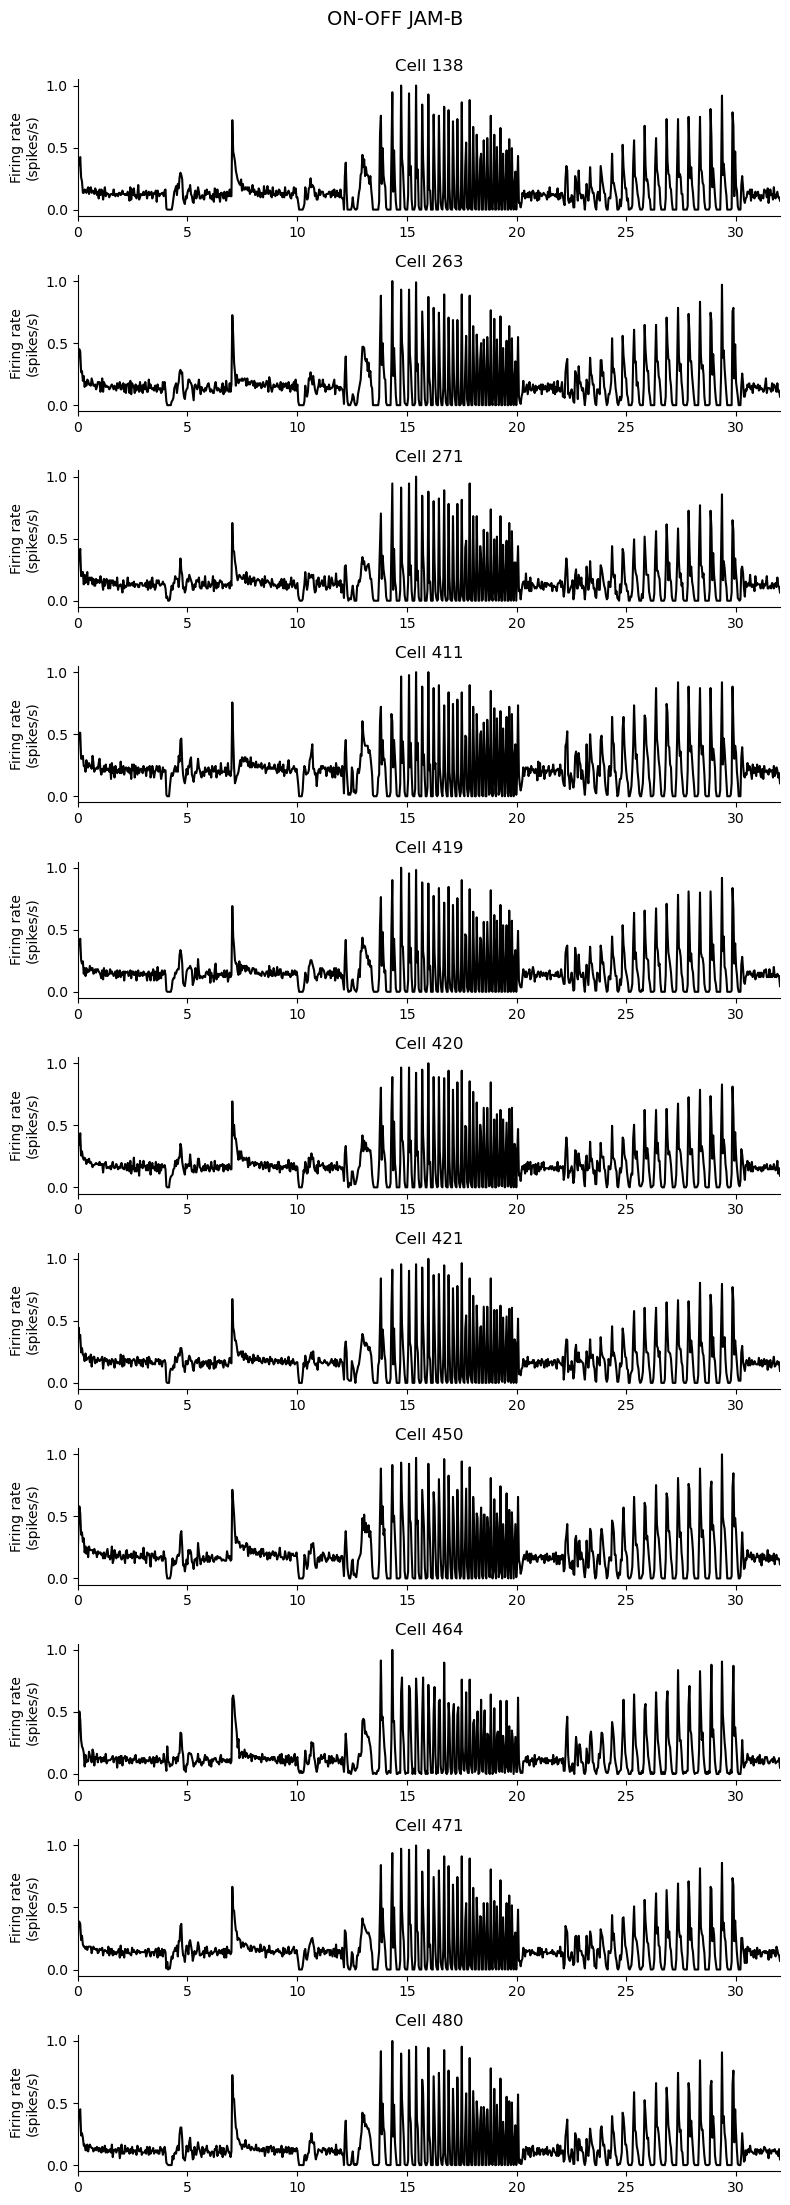

OFF alpha transient : [ 10 361]


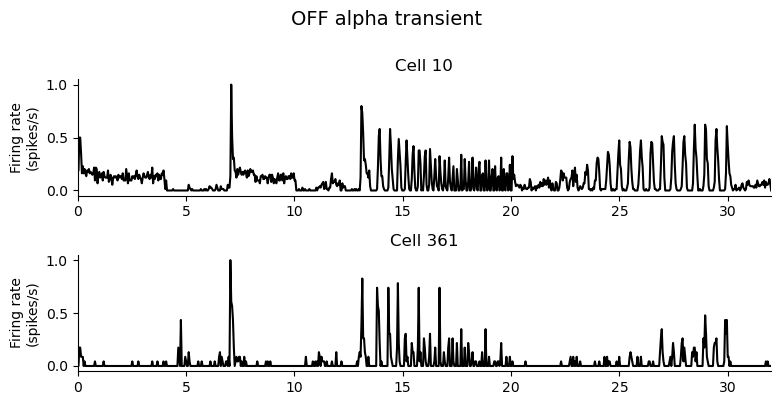

OFF mini alpha transient : [210 382 387 441 466 497 576 580 605 613]


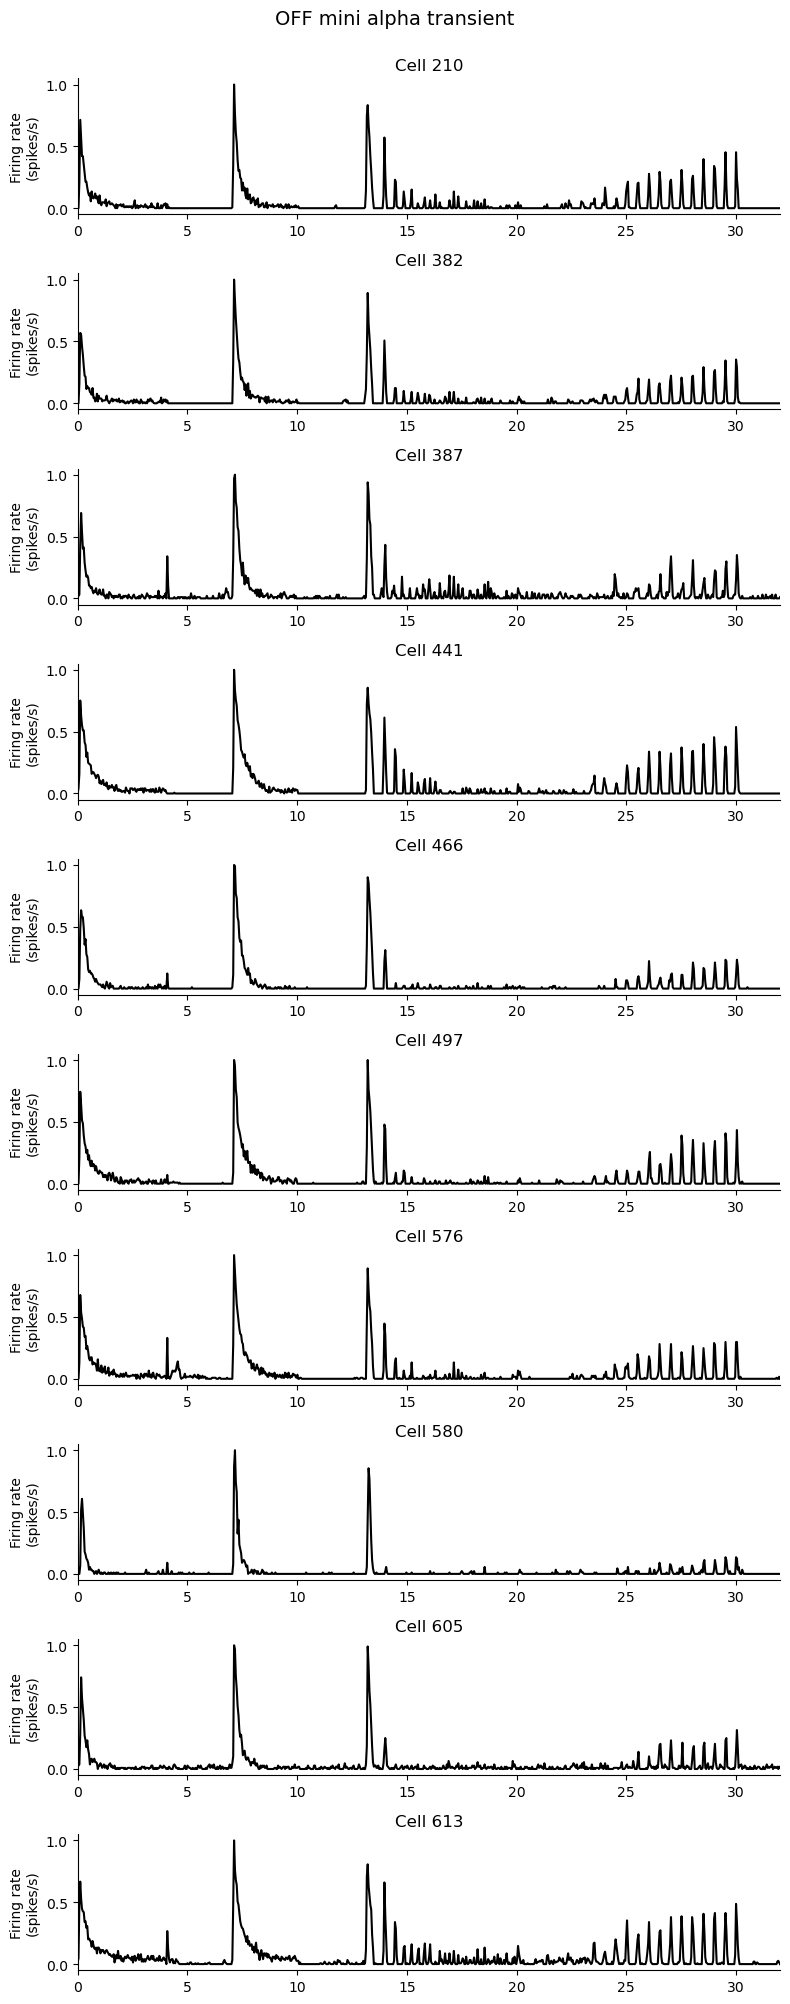

ON-OFF local-edge W3 : [368]


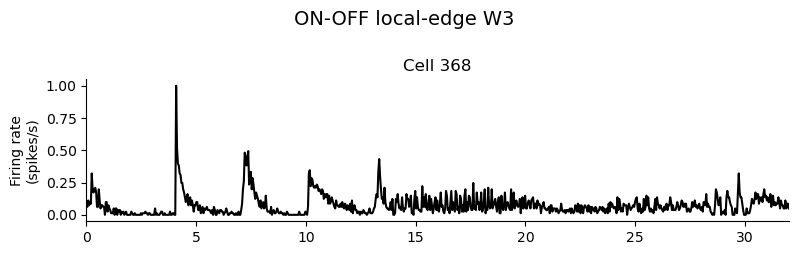

ON-OFF local : [83]


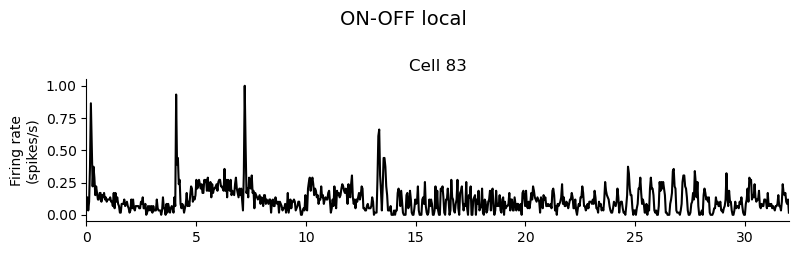

ON-OFF DS 2 : [359 532 592]


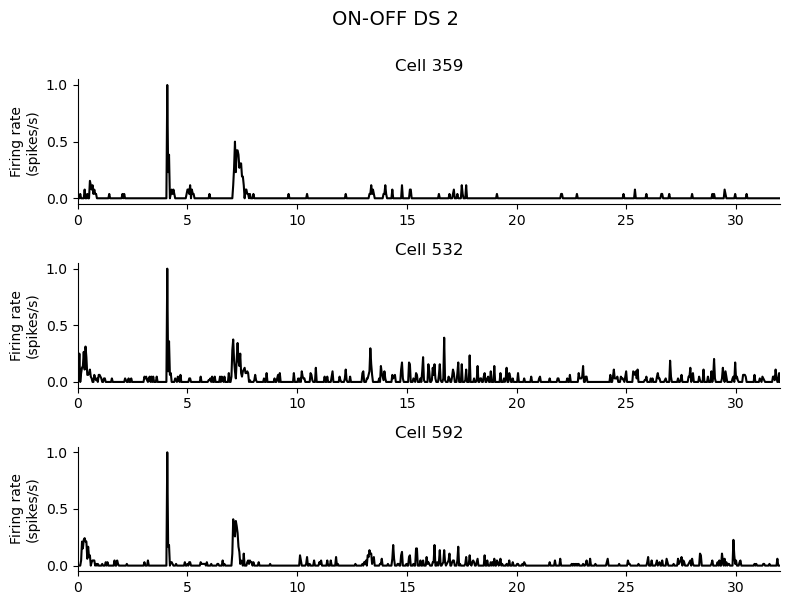

ON-OFF local OS : [ 56 119 130 380 460]


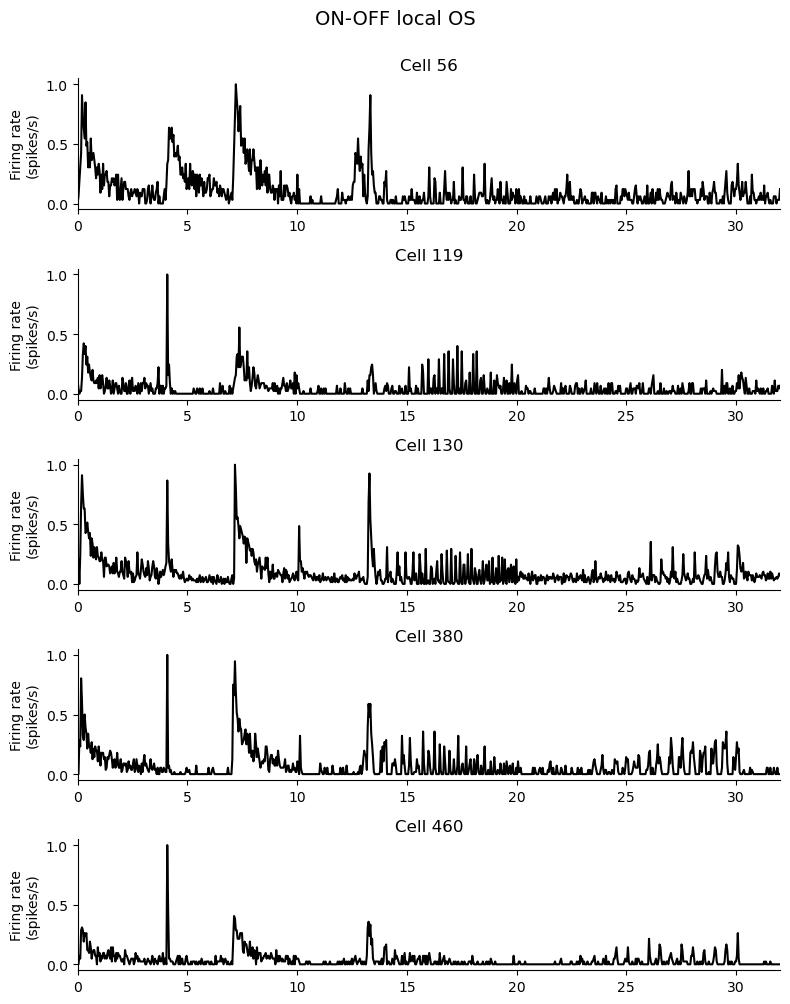

ON step : [100 102 296 452 506]


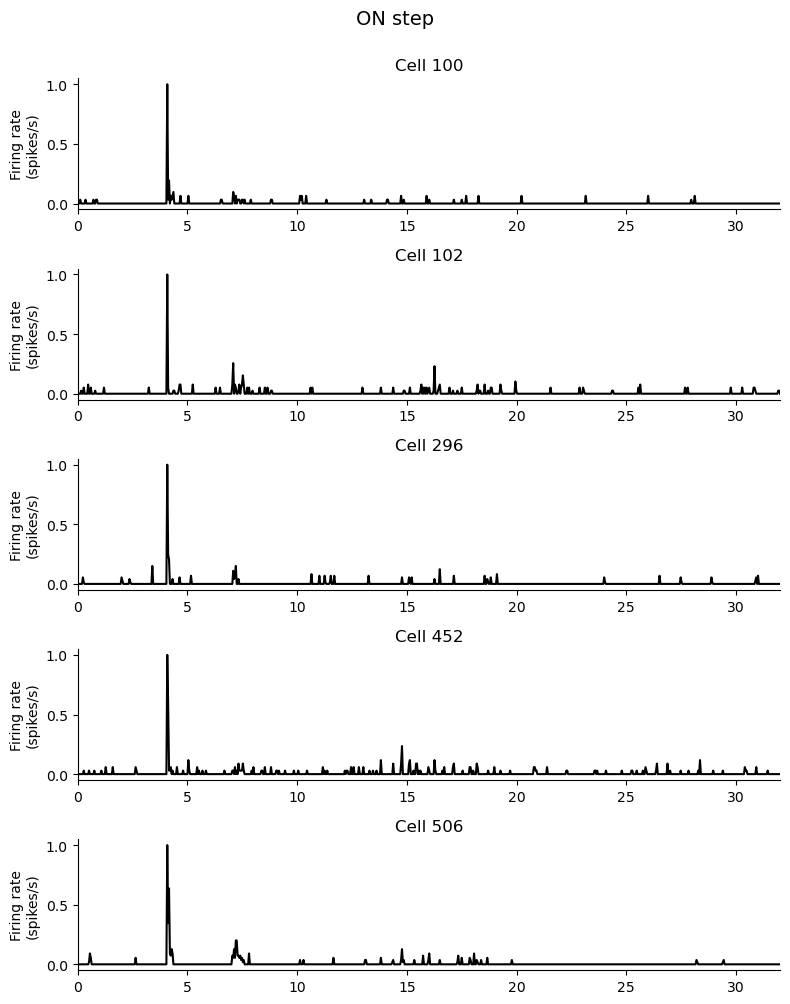

ON local transient OS : [ 45 498]


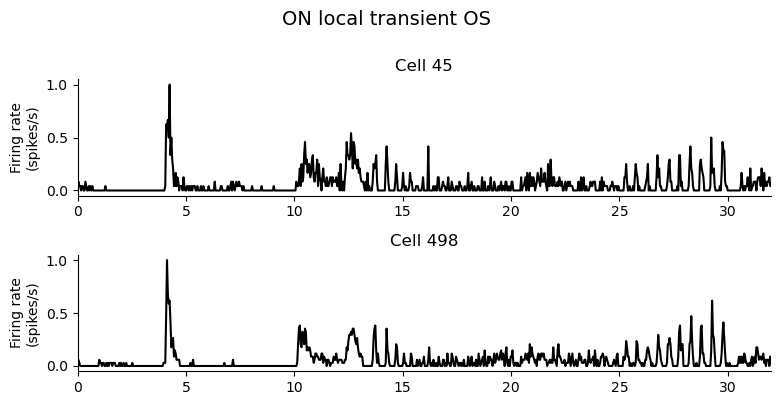

ON transient : [ 41  62 112 220 241 280 401 447 469 511]


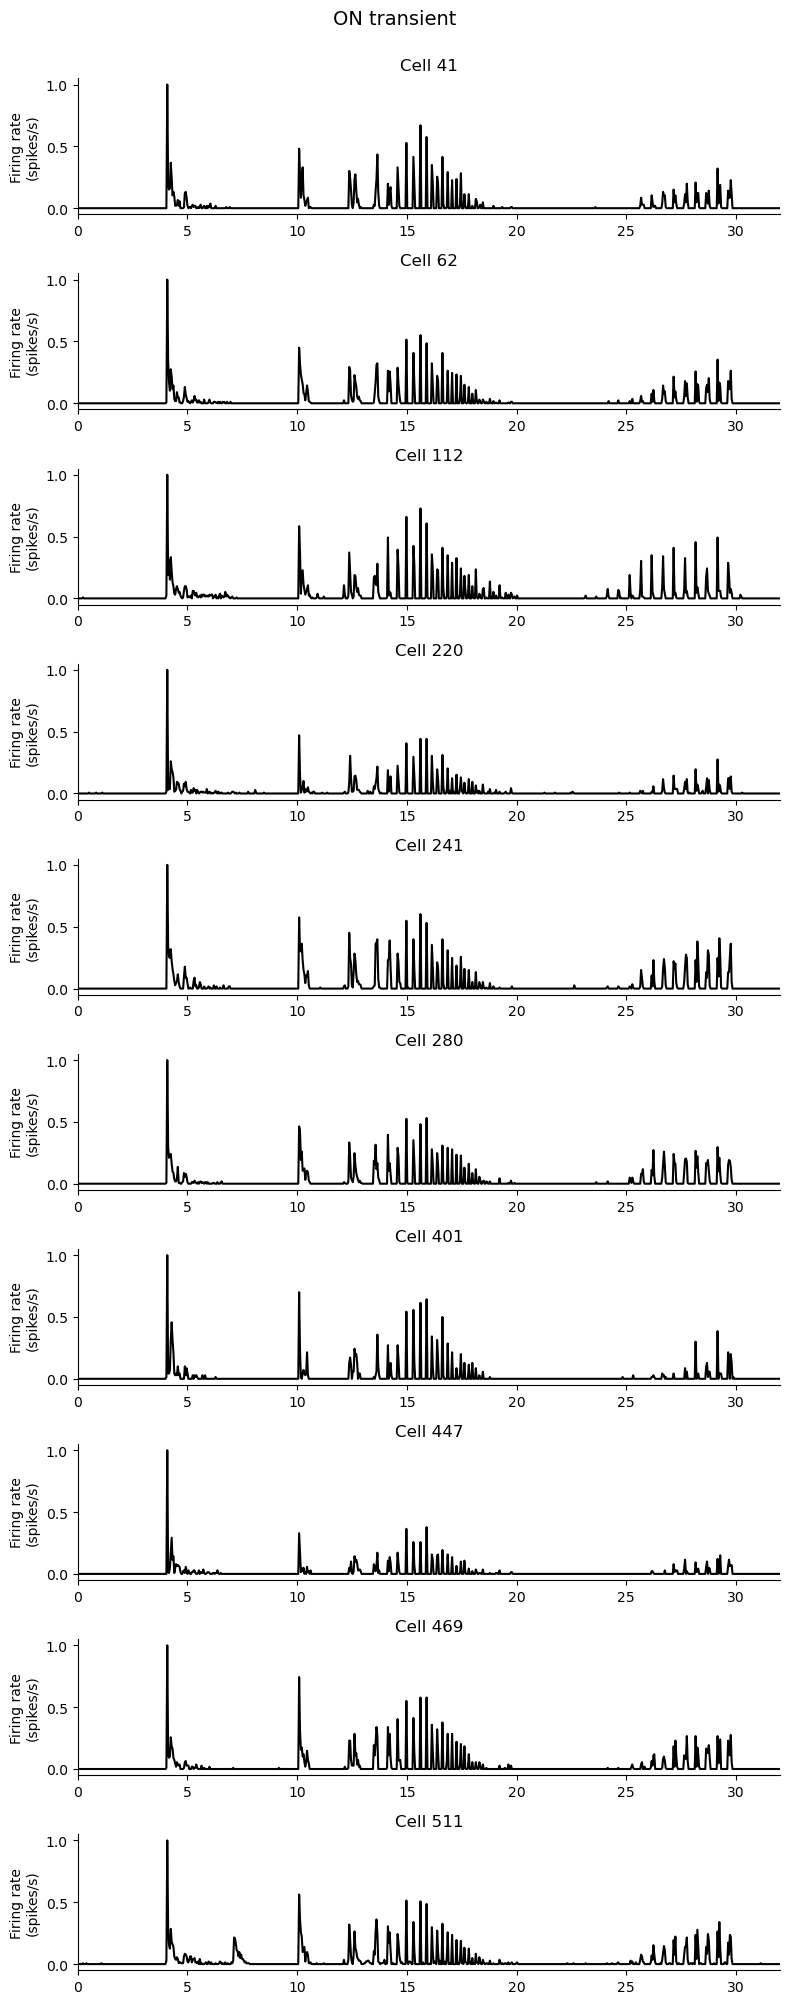

ON sustained : [158 329 356]


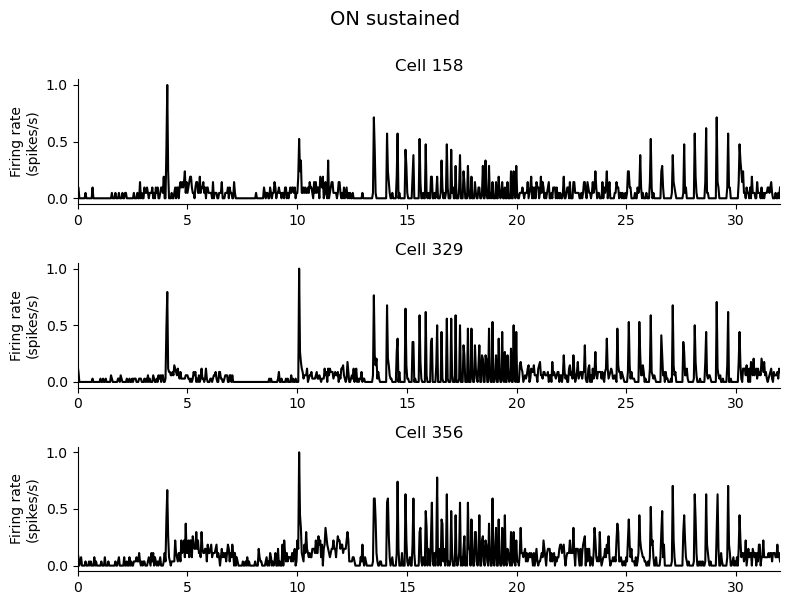

ON mini alpha : [ 55 472 529]


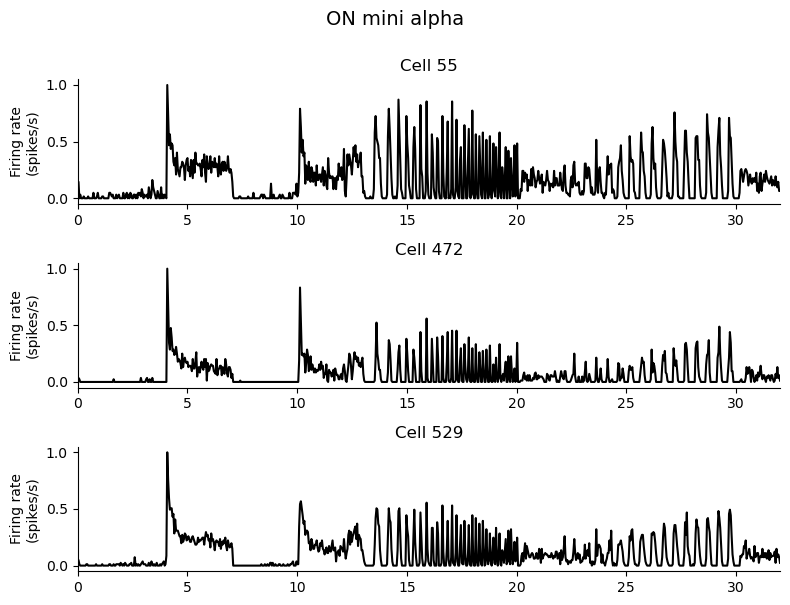

ON alpha : [144 273 424 435 449 463 513]


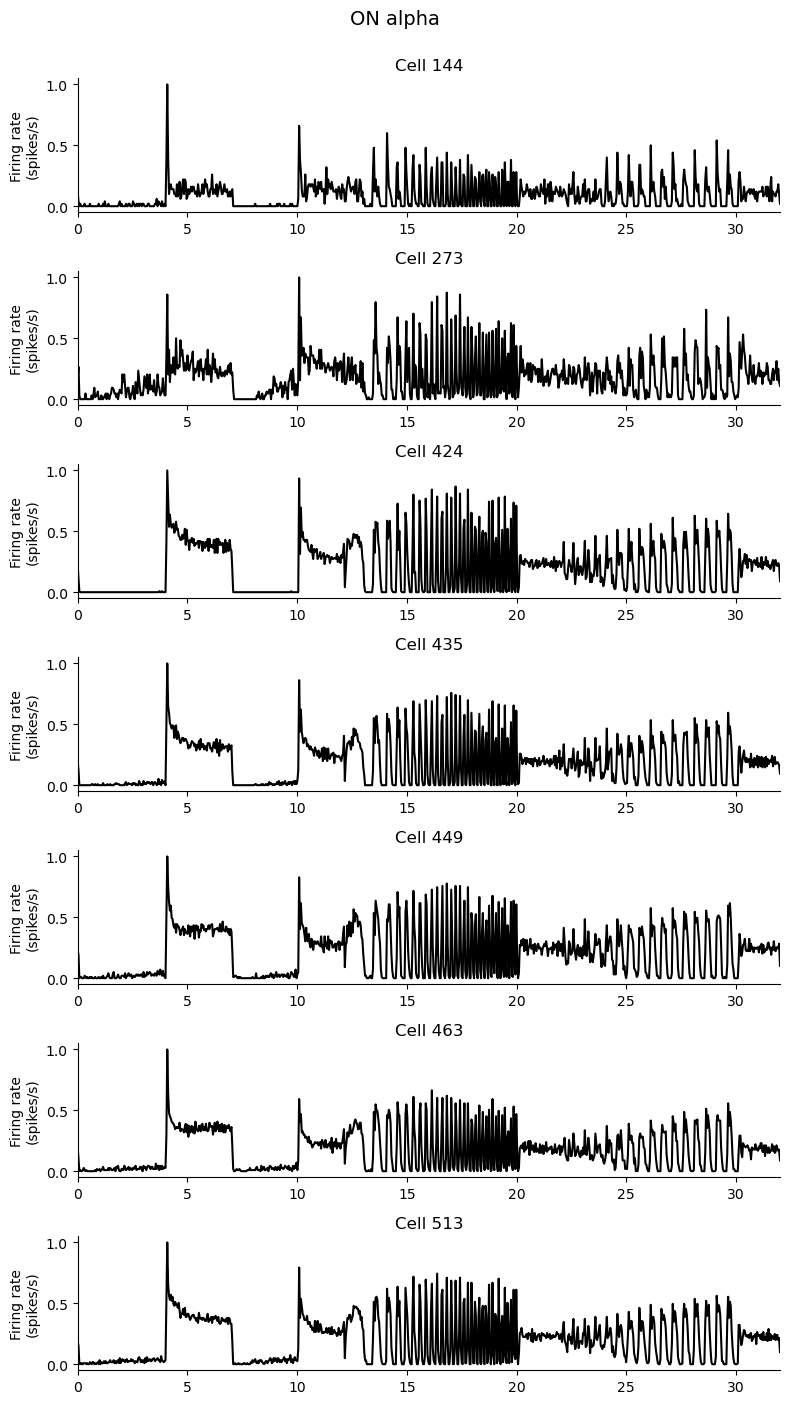

ON DS sustained 1 : [ 63 422 430 457]


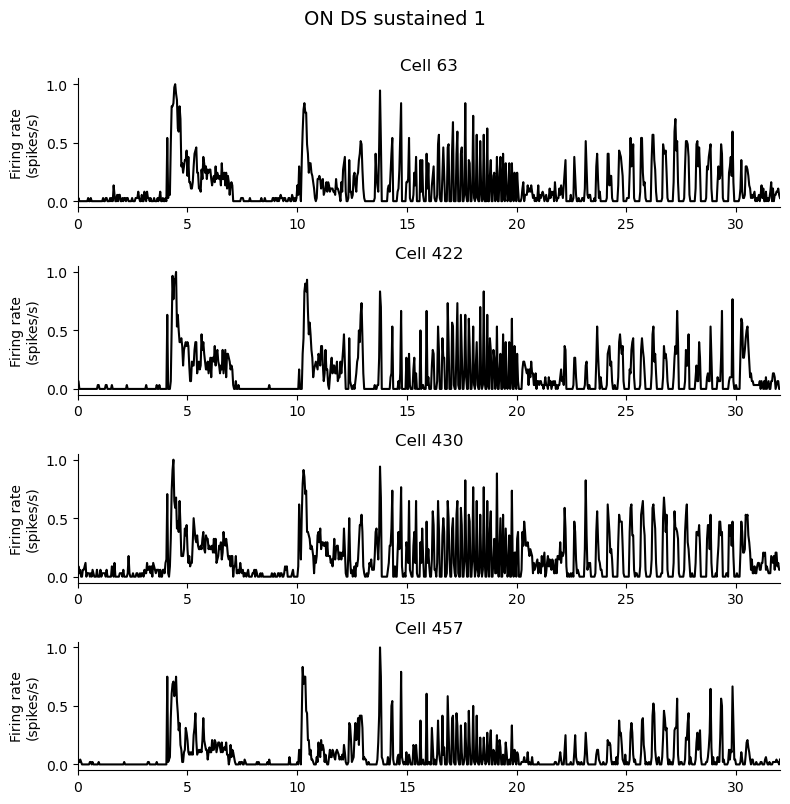

ON DS sustained 2 : [  5  66 284 300 333 370 470 493]


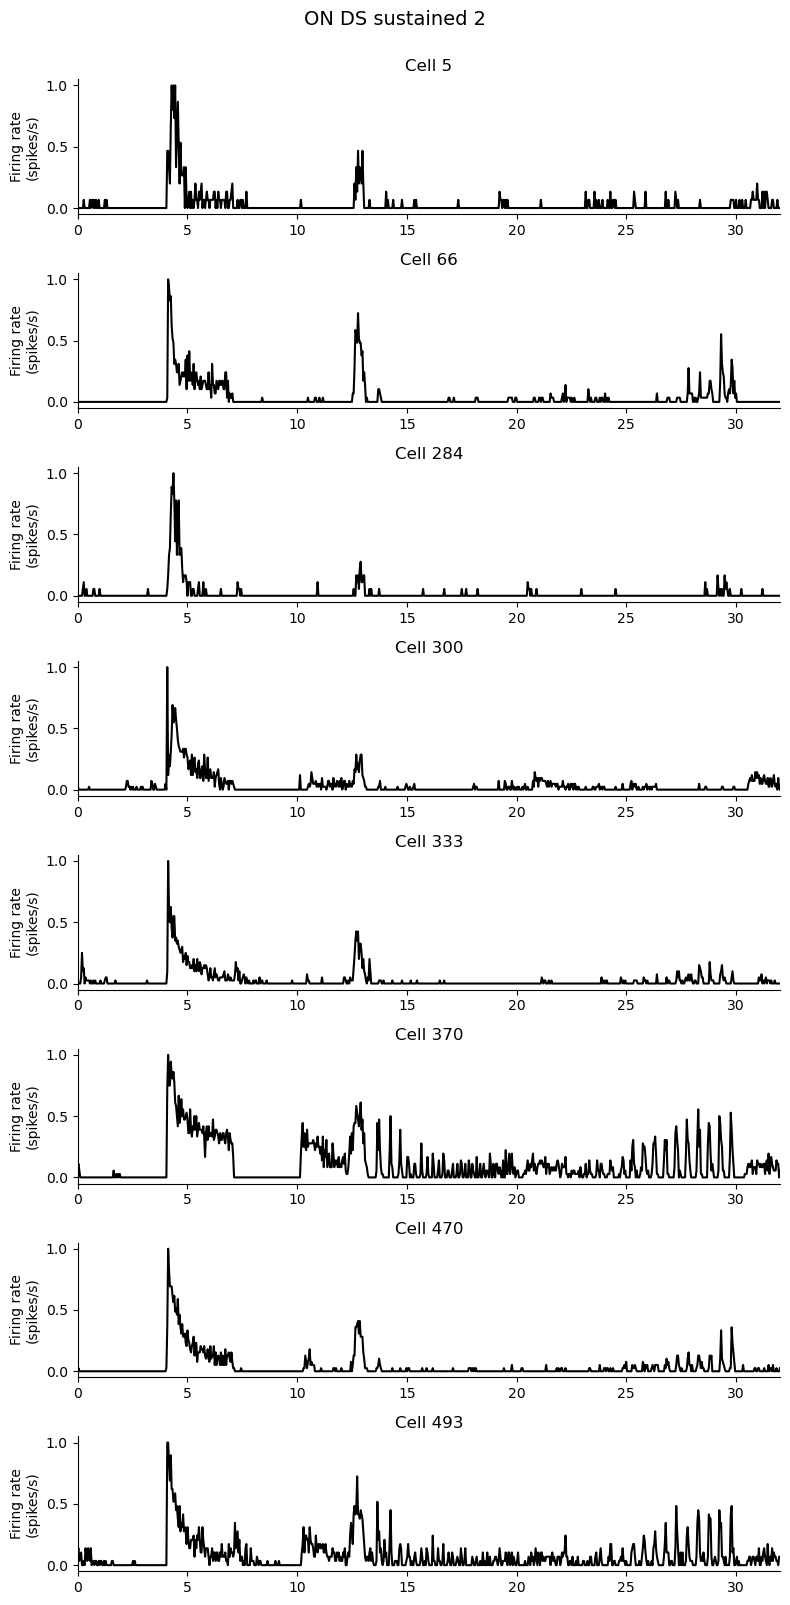

ON DS sustained 3 : [168 238]


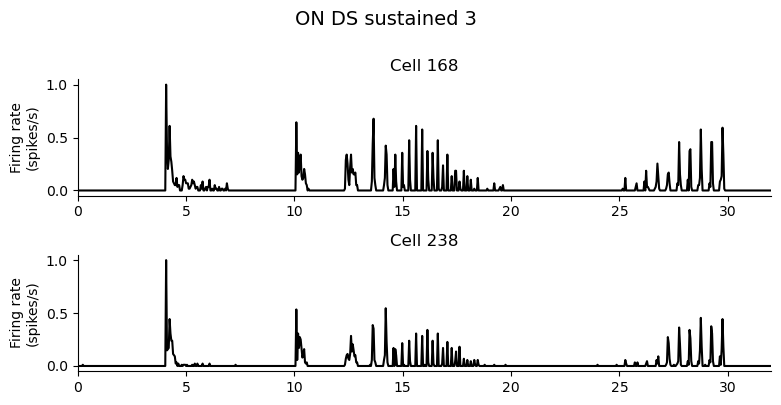

In [15]:
for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types_cleaned == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(8, 2.5))
        else:
            fig = plt.figure(figsize=(8, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 1)

        for i, cell_nb in enumerate(selected_cells):

            psth = cell_data[cell_nb]['psth']
            
            ax = fig.add_subplot(GS[i])
#             if euler_labels_cleaning[iLabel] == 1:
            ax.plot(np.linspace(0,32,800), psth/amax(psth), 'k')
#             elif euler_labels_cleaning[iLabel] == 0:
#                 ax.plot(np.linspace(0,32,800), psth/amax(psth), 'C3')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
        
        plt.tight_layout()
        plt.show()

In [28]:
# Save cleaned Baden type for each cell in 'selected_cells'
fsave = exp_path + str(exp) + '_celltype_Baden_cleaned_clus12_2024'
save_obj(cell_types_cleaned,fsave)

In [21]:
where(cell_types_cleaned == 13)

(array([ 7, 19, 22, 60, 84], dtype=int64),)

# Examine removed cells

In [17]:
removed_cells

[22,
 153,
 287,
 260,
 316,
 335,
 546,
 162,
 247,
 415,
 482,
 544,
 73,
 99,
 270,
 407,
 360,
 439,
 478,
 515,
 126,
 406,
 78,
 283,
 486,
 496]

22


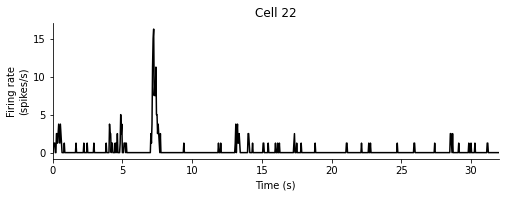

153


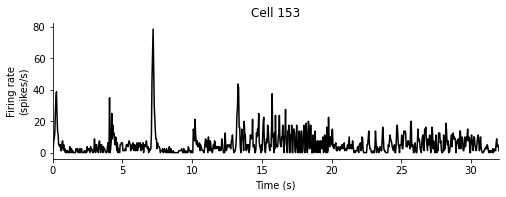

287


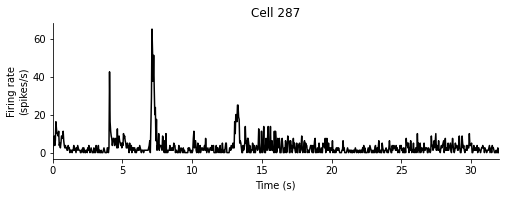

260


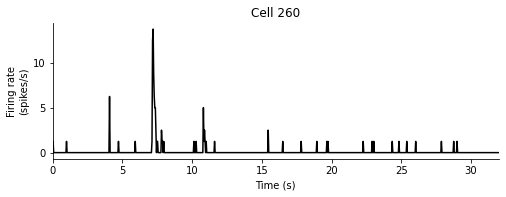

316


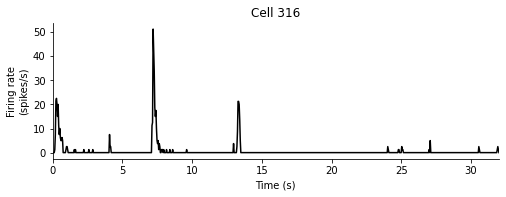

335


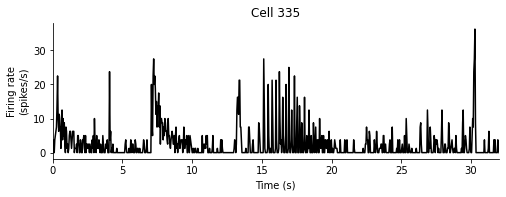

546


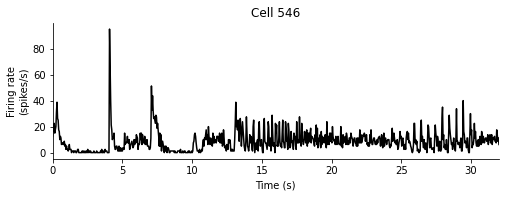

56


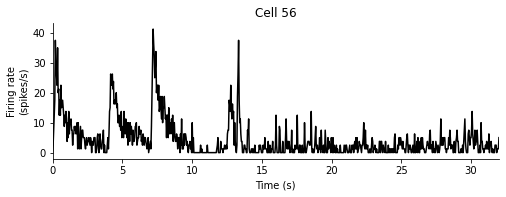

162


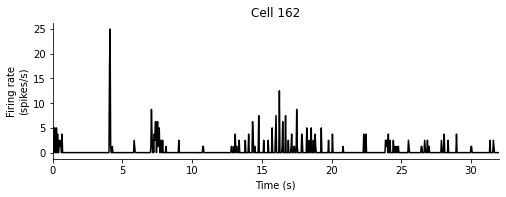

247


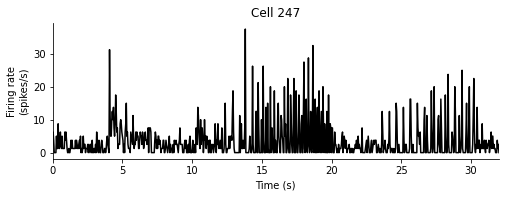

415


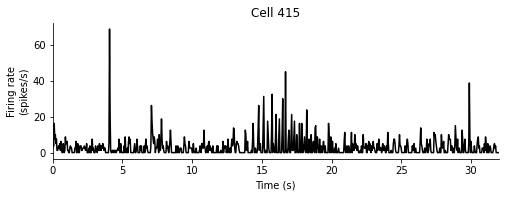

482


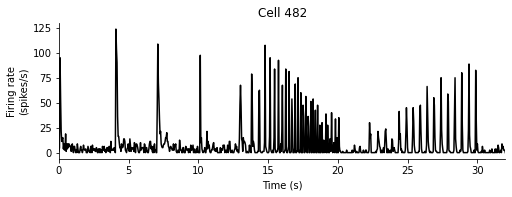

544


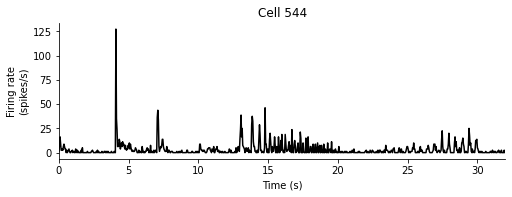

73


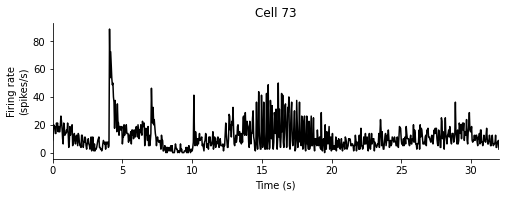

99


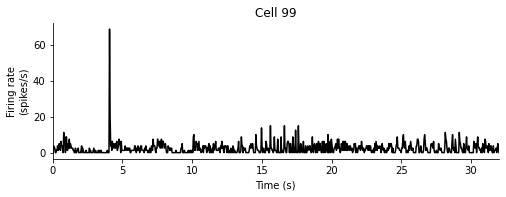

270


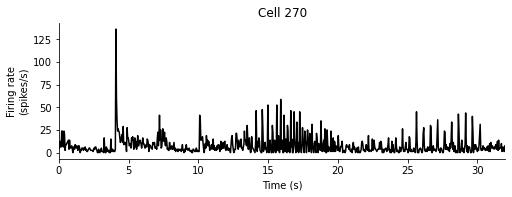

407


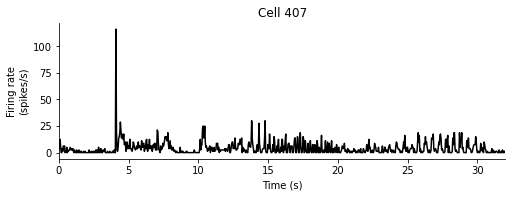

360


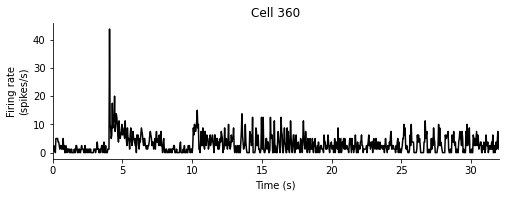

439


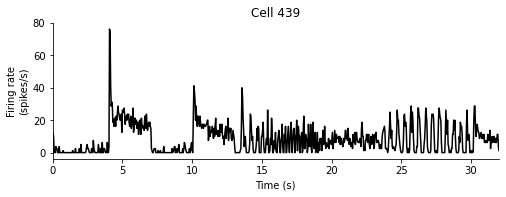

478


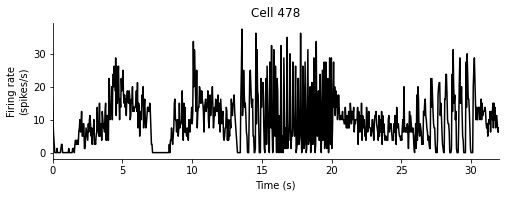

515


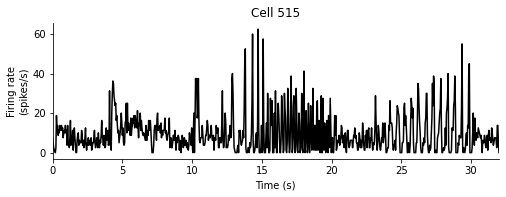

126


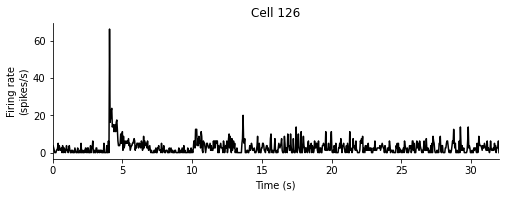

406


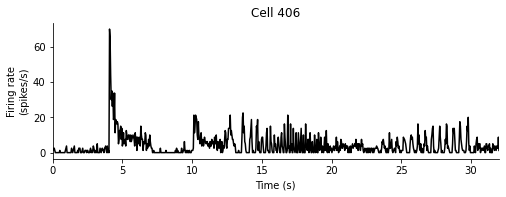

78


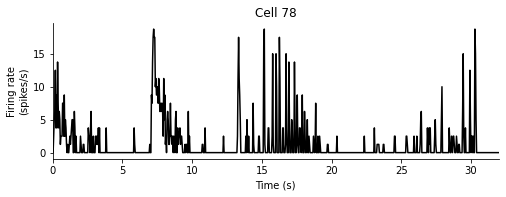

119


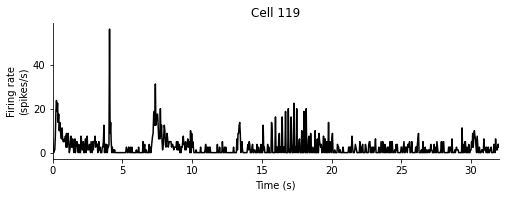

283


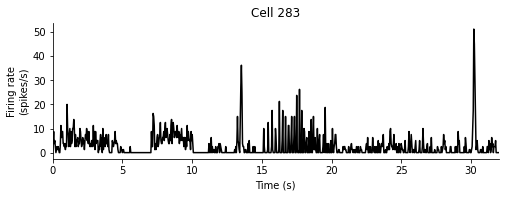

486


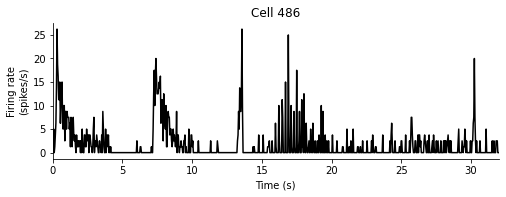

496


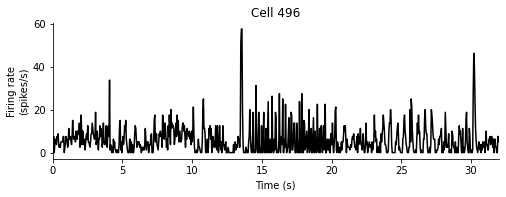

In [40]:
for cell_nb in removed_cells:
    print (cell_nb)
    fig = plt.figure(figsize=(8, 2.5))
    
    psth = cell_data[cell_nb]['psth']
    
    ax = fig.add_subplot(111)
    ax.plot(np.linspace(0,32,800), psth, 'k')
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Firing rate\n(spikes/s)")
    ax.set_title('Cell {}'.format(cell_nb))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 32)
    
    plt.show()

            